<a href="https://colab.research.google.com/github/PravinV001/Python/blob/main/Case_Study_Data_20_Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing data file in drive and reding from drive

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cd=pd.read_excel('/content/sample_data/CaseStudy/CustomersData.xlsx')
dc=pd.read_csv('/content/sample_data/CaseStudy/Discount_Coupon.csv')
os=pd.read_csv('/content/sample_data/CaseStudy/Online_Sales.csv')
ms=pd.read_csv('/content/sample_data/CaseStudy/Marketing_Spend.csv')
ta=pd.read_excel('/content/sample_data/CaseStudy/Tax_amount.xlsx')

In [66]:
'''########################################
Data cleaning of Marketing Spend Table. Below are steps:
   1) checking are there any Null Values
   2) Changing Date object to Date format
   3) Get Month in both number and Char
   4) Checking duplicate row, if any
   ######################################'''


ms['Date'] =pd.to_datetime(ms['Date'])
ms['MonthYr']=ms['Date'].dt.strftime('%b')
ms['MonthNum'] = pd.to_datetime(ms['MonthYr'], format='%b').dt.month

null_any = ms.isnull().values.any()
if null_any == False:
 print('No null value')

ms['Offline_Spend']=ms['Offline_Spend'].astype(float)

ms=ms.drop_duplicates(keep='first').reset_index(drop=True)

print('Marketing Spend Data is verified and final structure')
ms.info()


No null value
Marketing Spend Data is verified and final structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    float64       
 2   Online_Spend   365 non-null    float64       
 3   MonthYr        365 non-null    object        
 4   MonthNum       365 non-null    int32         
 5   Total_Spend    365 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 15.8+ KB


In [3]:
'''########################################
Data cleaning of customer data Spend Table
   1) checking are there any Null Value, if any
   2) Checking duplicate row, if any '''

null_any = cd.isnull().values.any()

if null_any == False:
 print('No Null value')

cd=cd.sort_values(by='Tenure_Months')
#print(cd.head(5))


# Dropping duplicate, if any. There is no duplicate in this table
#cd=cd.drop_duplicates(keep='first').reset_index(drop=True)
#print(cd.head(5))
#cd.info()

print('Customer Data is verified and below is final DF')
cd.info()

Customer Data is having no null
     CustomerID Gender    Location  Tenure_Months
694       15361      M    New York              2
83        16539      M  California              2
70        12472      F  New Jersey              2
971       14653      M  California              2
962       17389      F    New York              2
<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 694 to 1454
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 57.3+ KB
Customer Data is verified


In [68]:
from pandas.core import groupby
'''########################################
Data cleaning of Operation Sales data. Below are steps:
   1) checking are there any Null Values
   2) Changing Date object to Date format
   3) Get Month in both number and Char
   4) Checking duplicate row, if any
   ######################################'''

null_any = os.isnull().values.any()

# Changing Transaction date from object to datetime
os['Transaction_Date'] = pd.to_datetime(os['Transaction_Date'],errors='coerce')
os['MonthYr'] = pd.to_datetime(os['Transaction_Date']).dt.strftime('%b')


# Removing Duplicate records. Now, this operation is performed on the already initialized os1.
os1=os.drop_duplicates(keep='first').reset_index(drop=True)


# There are two records which are not good removing them before analysis
if null_any == True:
  os1 = os1.dropna().reset_index(drop=True)


# Changing Delivery charges and Avg Price from object to float
if 'Delivery_Charges' in os1.columns:
    os1['Delivery_Charges'] = os1['Delivery_Charges'].astype(float)
else:
    print("Warning: 'Delivery_Charges' column not found in os1.")

if 'Avg_Price' in os1.columns:
    os1['Avg_Price'] = os1['Avg_Price'].astype(float)
else:
    print("Warning: 'Avg_Price' column not found in os1.")

#Extracting Month number from Transaction Date
os1['MonthNum'] = pd.to_datetime(os1['MonthYr'], format='%b').dt.month

osfin=os1
osfin.info()

os1=os.groupby(['CustomerID','MonthYr'])['Transaction_ID'].count().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  MonthYr              52924 non-null  object        
 11  MonthNum             52924 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(5)
memory usage: 4.6+ MB


In [69]:
'''###Data cleaning of Discounted Coupans
   1) checking are there any Null Value, if any
   2) Checking duplicate row, if any
   3) Checking Data type correction, if req'''

null_any = dc.isnull().values.any()

if null_any == False:
 print('Discounted coupan has no null value')

# Creating additional column MonthNum from Month
dc['MonthNum'] = pd.to_datetime(dc['Month'], format='%b').dt.month

# There is no duplicate record in this table
dc=dc.drop_duplicates(keep='first').reset_index(drop=True)

print('Discounted Coupan is verified and below is final DF')
dc.info()

Discounted counpan has no null value
Discounted Coupan is verified and below is final DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
 4   MonthNum          204 non-null    int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 7.3+ KB


In [70]:
'''Data cleaning of tax amount
   1) checking are there any Null Value, if any
   2) Checking duplicate row, if any
   3) Checking Data type correction, if req'''

null_any = ta.isnull().values.any()
if null_any == False:
 print('Tax Amount has no null value')

ta=ta.drop_duplicates(keep='first').reset_index(drop=True)

print('Tax Amount is verified')
ta.info()

Tax Amount has no null value
Tax Amount is verified
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


####################################################

 ***All Data is formated. Now, we will work on Creating table which we can use to analyse data in 10 case study Questions***

In [71]:

osfin2=pd.merge(osfin,dc[['Discount_pct','MonthNum','Product_Category']],on=['MonthNum','Product_Category'],how='left')

osfin2=pd.merge(osfin2,ta[['Product_Category','GST']],on=['Product_Category'],how='left')

null_any = osfin2.isnull().values.any()

# There are few product category on which there is no discount so we will get few columns with Null and
# for those changing Dic_Percentage to Zero

if null_any == False:
   print('final osfin has no Null means all join works fine')
else:
  osfin2['Discount_pct'] = osfin2['Discount_pct'].fillna(0)


# Calculating Revenue beased on Discount Coupan used or Not
osfinal=osfin2
osfinal['Rev'] = np.where(
osfinal['Coupon_Status'] == 'Not Used',
(osfinal['Quantity'] * osfinal['Avg_Price']) * (1 + osfinal['GST']) + osfinal['Delivery_Charges'],
(osfinal['Quantity'] * osfinal['Avg_Price']) * (1 - (osfinal['Discount_pct']/100)) * (1 + osfinal['GST']) + osfinal['Delivery_Charges']
)
osfinal['Rev'] = osfinal['Rev'].round(2)

print('final dataframe whish we will be using for all questions')
osfinal.info()

final dataframe whish we will be using for all questions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  MonthYr              52924 non-null  object        
 11  MonthNum             52924 non-null  int32         
 12  Discount_pct         52924 non-

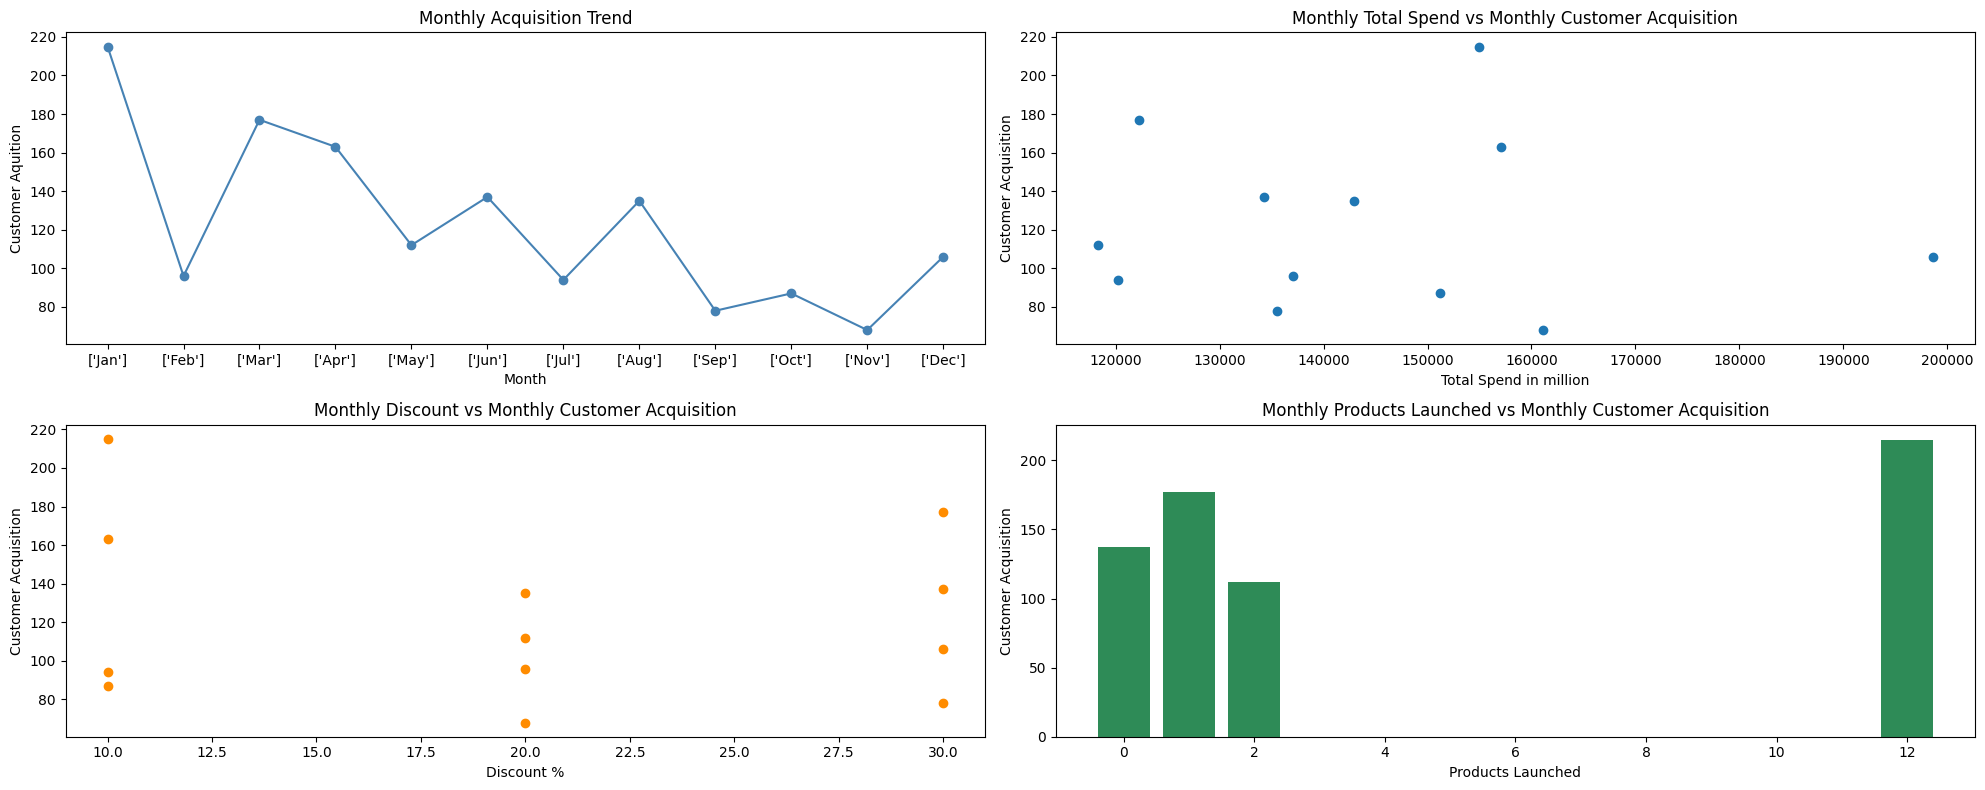

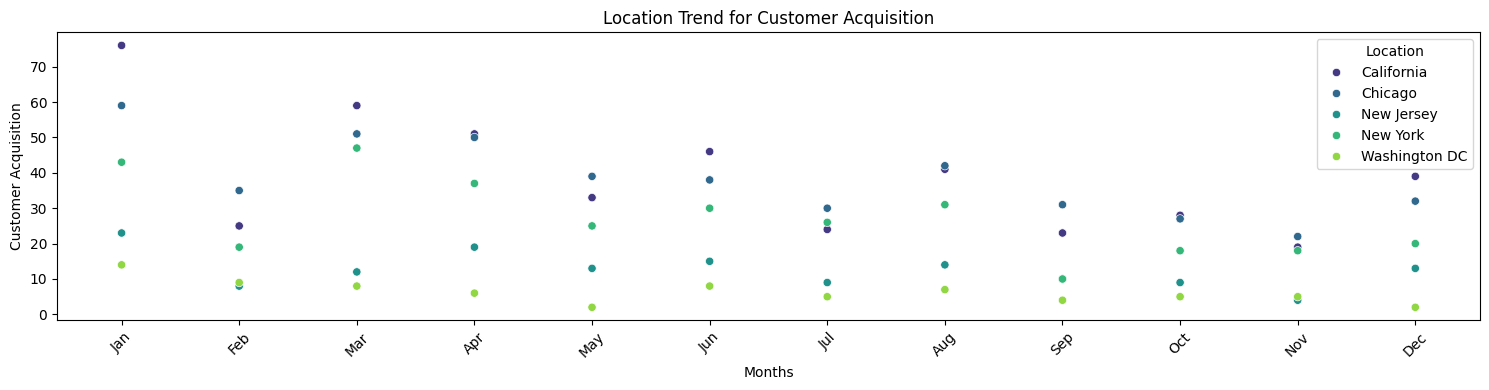

In [89]:

#We will be using osfinal in all question as it has data required with all relevent values from 3 tables
osq1=osfinal.sort_values(('Transaction_Date'),ascending=True)

# Dropping all duplicate to get first transaction done by customer
osq1=osq1.drop_duplicates(subset=['CustomerID'], keep='first',ignore_index=True)


########################################
'''' Analysing discount to understand aquisition count trend'''
#Getting Product wise monthly discount to understand it's impact on new customer onborading

#As per data there is discount on monthly basis agnostic of product so only doing group by on month
dc1=dc.sort_values(['MonthNum','Product_Category'])
dc1=dc1.reset_index(drop=True)
dc1=dc1.groupby('MonthNum')['Discount_pct'].unique()

########################################
## Analysing Marketing spend to understand aquisition count trend
ms['Total_Spend'] = ms['Offline_Spend'] + ms['Online_Spend']

#There is no trend found on online and offline spend so using total spend to understand pattern
ms2=ms.groupby('MonthNum').agg({'Total_Spend':'sum'}).reset_index()


osq1=pd.merge(osq1,ms2,on=['MonthNum'],how='left')

# Group by month to get number of transaction done by customer
osq1a=osq1.groupby('MonthNum').agg({'CustomerID':'count','Total_Spend':'unique','Discount_pct':'max','MonthYr':'unique'}).reset_index().sort_values('MonthNum')


########################################
# To get trend when particular Product is launched so getting entry when first product is used
osq1c=osq1.drop_duplicates(subset=['Product_Category'], keep='first',ignore_index=True)

#Group by on month to understand product launch
osq1c=osq1c.groupby('MonthNum')['Product_Category'].count().reset_index().sort_values('MonthNum')


########################################
# Final DF to analyse trend for new aquititon
osq1d=pd.merge(osq1a,osq1c[['MonthNum','Product_Category']],on=['MonthNum'],how='left')

osq1d=osq1d.rename(columns=({'Product_Category':'Product_Launched'}))

osq1d['Product_Launched']= osq1d['Product_Launched'].fillna(0)
osq1d['Product_Launched']=osq1d['Product_Launched'].astype(np.int64)
#osq1d['Total_Spend']=osq1d['Total_Spend']/1000000
osq1d['Total_Spend']=osq1d['Total_Spend'].round(2)
osq1d['MonthYr']=osq1d['MonthYr'].astype(str)


# Extract the single month string from the list in 'MonthYr'
osq1d['MonthYr_str'] = osq1d['MonthYr'].apply(lambda x: x[0] if isinstance(x, list) else x)

#### Plotting the trends in 2*2 subplot

plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
plt.plot(osq1d['MonthYr_str'], osq1d['CustomerID'],marker='o',color='steelblue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Customer Aquition')
plt.title('Monthly Acquisition Trend')

### Subplot 2 (Changed from original to match correct indexing and avoid duplicate plt.show() which creates separate figures)
plt.subplot(2, 2, 2)
plt.scatter(osq1d['Total_Spend'], osq1d['CustomerID'])
plt.xlabel('Total Spend in million')
plt.ylabel('Customer Acquisition')
plt.title('Monthly Total Spend vs Monthly Customer Acquisition')

### Subplot 3
plt.subplot(2, 2, 3)
plt.scatter(osq1d['Discount_pct'], osq1d['CustomerID'], color='darkorange')
plt.title('Monthly Discount vs Monthly Customer Acquisition')
plt.xlabel('Discount %')
plt.ylabel('Customer Acquisition')

### Subplot 4
plt.subplot(2, 2, 4)

plt.bar(osq1d['Product_Launched'], osq1d['CustomerID'], color='seagreen')
plt.title('Monthly Products Launched vs Monthly Customer Acquisition')
plt.xlabel('Products Launched')
plt.ylabel('Customer Acquisition')

plt.tight_layout()
plt.show()

#########################################################
# Below is additional analysis to understand is there any part of location in getting new aquition

# merging operation sales and customer data table to get location to understand trend based on location
osca= pd.merge(osq1,cd[['CustomerID','Location']],on=['CustomerID'],how='left')
#print(osca)

# Group by month and location to get number of transaction done by customer per location
osq1b=osca.groupby(['MonthNum','Location'])['CustomerID'].count().reset_index().sort_values(['Location','MonthNum'])
osq1b=osq1b.reset_index(drop=True)

####################
### Checking location trend for customer Aquisition

plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=osq1b,
    x='MonthNum',
    y='CustomerID',
    hue='Location',
    palette='viridis'
)

plt.xlabel('Months')
plt.ylabel('Customer Acquisition')
plt.title('Location Trend for Customer Acquisition')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



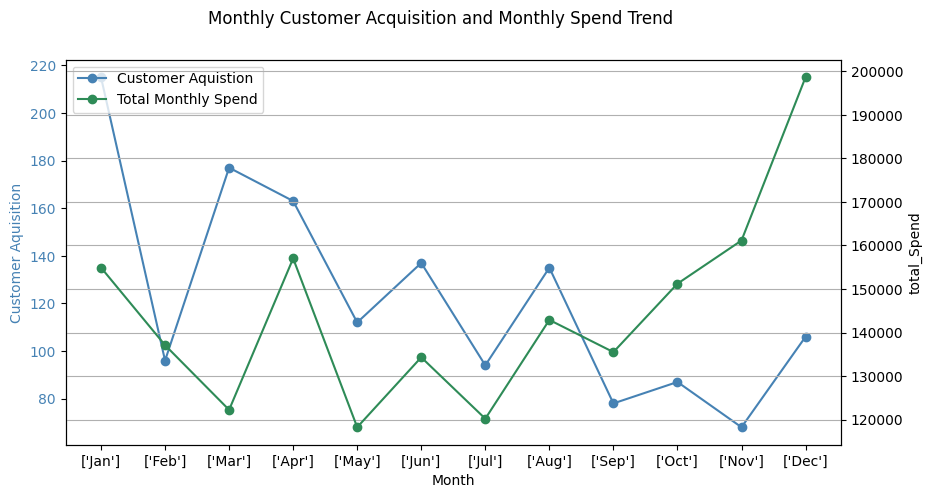

In [76]:
## To analyse Q1 and Q2 creating plot of customer Aquistion againse monthly spend

fig, ax1 = plt.subplots(figsize=(10, 5))

# Customer Acquisition (Left Y-axis)
ax1.plot(osq1d['MonthYr'], osq1d['CustomerID'],
         color='steelblue', marker='o', label='Customer Aquistion')
ax1.set_xlabel('Month')
ax1.set_ylabel('Customer Aquisition', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Second Y-axis
ax2 = ax1.twinx()

# Total Spend
ax2.plot(osq1d['MonthYr'], osq1d['Total_Spend'],
         color='seagreen', marker='o', label='Total Monthly Spend')

ax2.set_ylabel('total_Spend', color='black')

# Title & legend
fig.suptitle('Monthly Customer Acquisition and Monthly Spend Trend')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.show()

***Conclusion --- As per the analysis for customer aquisition there is not major impact of discount strategy as discuount strategy is on month basis and repetative. New customer Aquisition is kind of impacted by marketing spend. We need more data to get into exact reason of marketing Spend. Also, there is no new product launched from March to Nov see impact of new Aquition and trend is reversing once we have new product launces in December***

Also, below are additional observation:

Based on data analysis, Product category on which there is no discount are Product_Category

Backpacks -- 81
Fun -- 158
Google -- 105
More Bags -- 46 bold text **bold text**

Q3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?

Monthly Retention rate = (Customers in Month X who returned in Month X+1) /  (total number of customers in month X)

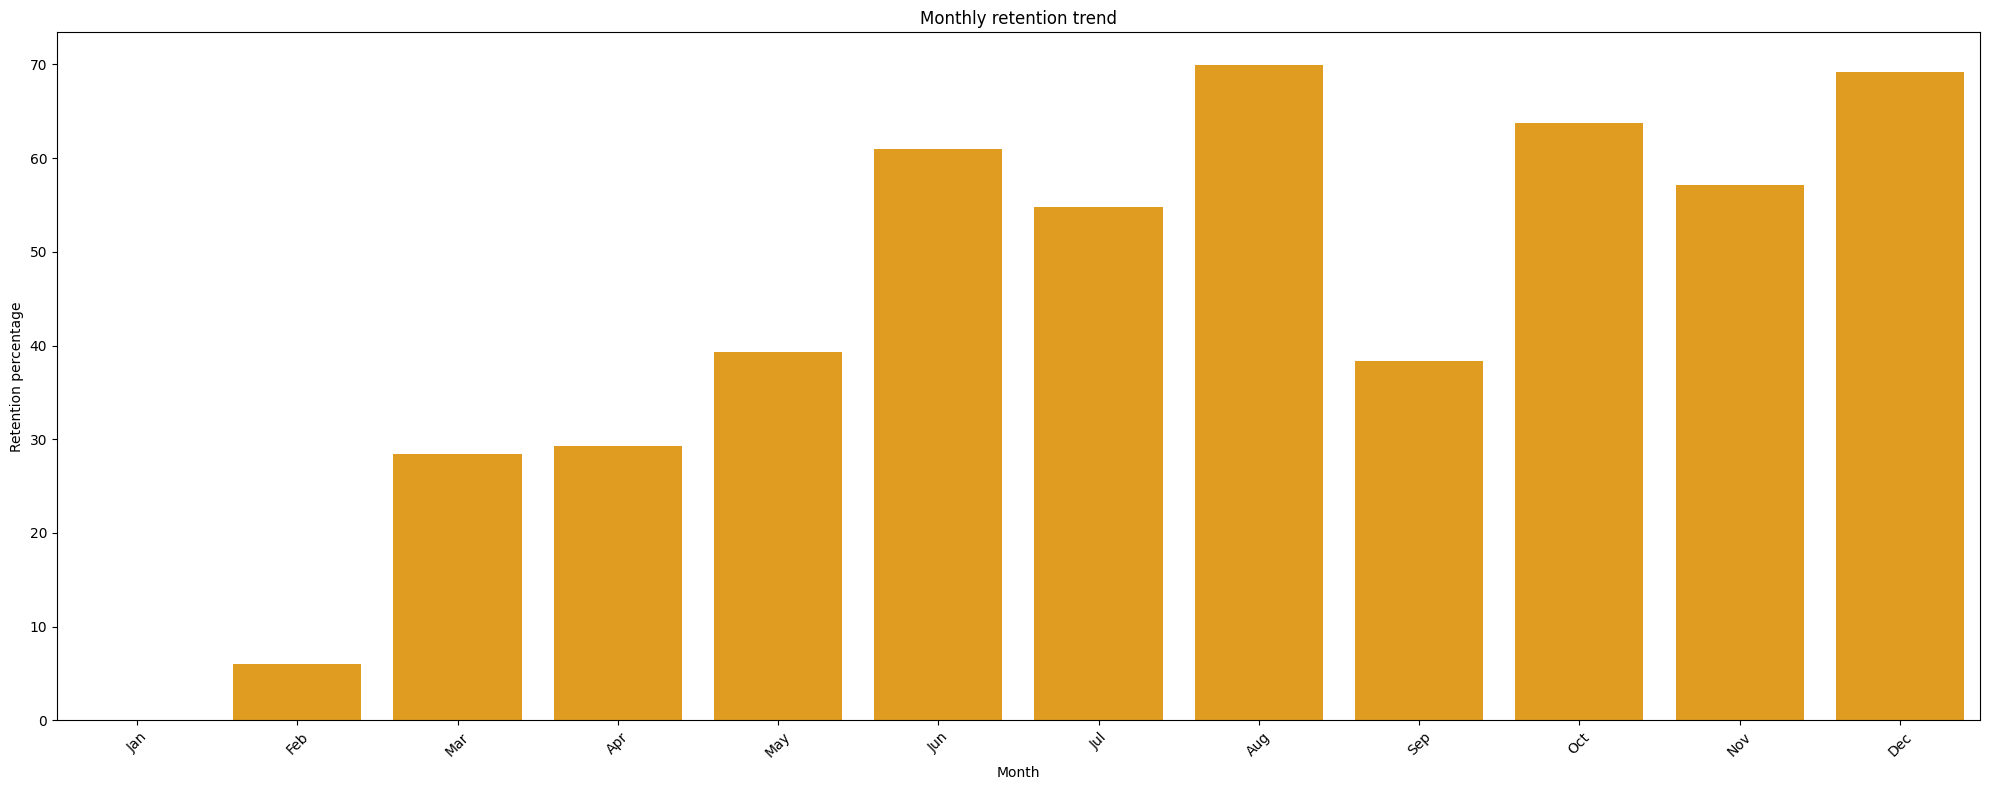

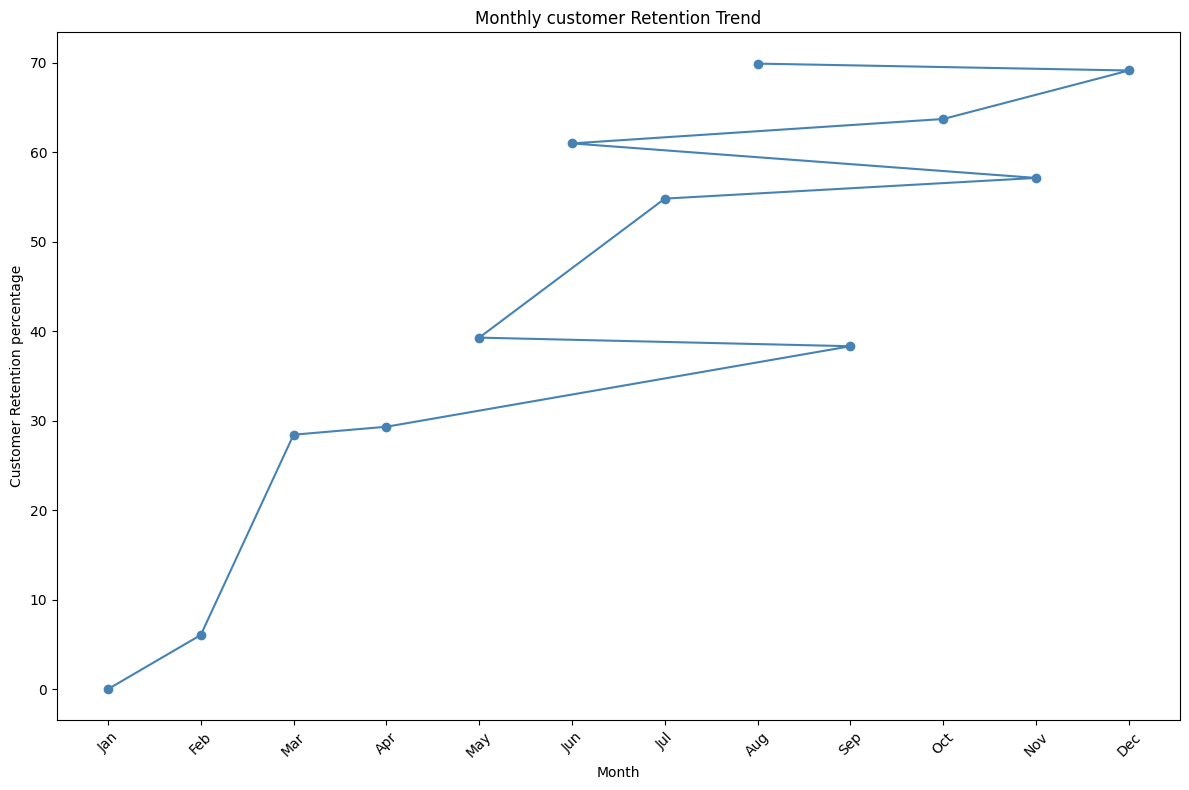

In [81]:
#osfinal.info()

osq3=osfinal.sort_values(('Transaction_Date'),ascending=True)

## Get count of all cusomter unique ID who did transaction in any month
osq3a=osq3.groupby('MonthNum')['CustomerID'].nunique().reset_index().sort_values('MonthNum')

## Get customer who did first transaction in any month
osq3b=osq3.drop_duplicates(subset=['CustomerID'], keep='first',ignore_index=True)
osq3b=osq3b.groupby('MonthNum')['CustomerID'].count().reset_index().sort_values('MonthNum')

# Merge the two to get new customer Id and all Customer ID for any month
osq3c= pd.merge(osq3a,osq3b,on=['MonthNum'],how='left')
osq3c = osq3c.rename(columns={'CustomerID_x':'Customer_ID_all','CustomerID_y':'Customer_ID_new'})

# Calculate retantion percentage
osq3c['Customer_ID_Ret'] = osq3c['Customer_ID_all'] - osq3c['Customer_ID_new']

osq3c['Customer_Ret_Per'] = osq3c.Customer_ID_Ret.shift(-1) / osq3c.Customer_ID_all * 100

osq3c['Customer_Ret_Per'] = osq3c['Customer_Ret_Per'].shift(+1)
osq3c['Customer_Ret_Per'] = osq3c['Customer_Ret_Per'].round(2)

osq3d= pd.merge(osq3c,osq1d[['MonthNum','Total_Spend']],on=['MonthNum'],how='left')

# Mark Null for very first month to Zero
osq3d=osq3d.fillna(0)

osq3d = osq3d.sort_values('Customer_Ret_Per').reset_index(drop=True)

#### Create Retention percentage plot for every month and understand month with lower values

plt.figure(figsize=(20, 8))

sns.barplot(data=osq3d, x='MonthNum', y='Customer_Ret_Per', color='orange')
plt.xlabel('Month')
plt.ylabel('Retention percentage')
plt.title('Monthly retention trend')

plt.xticks(ticks=range(0, 12), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

plt.plot(osq3d['MonthNum'], osq3d['Customer_Ret_Per'],marker='o',color='steelblue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Customer Retention percentage')
plt.title('Monthly customer Retention Trend')

plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

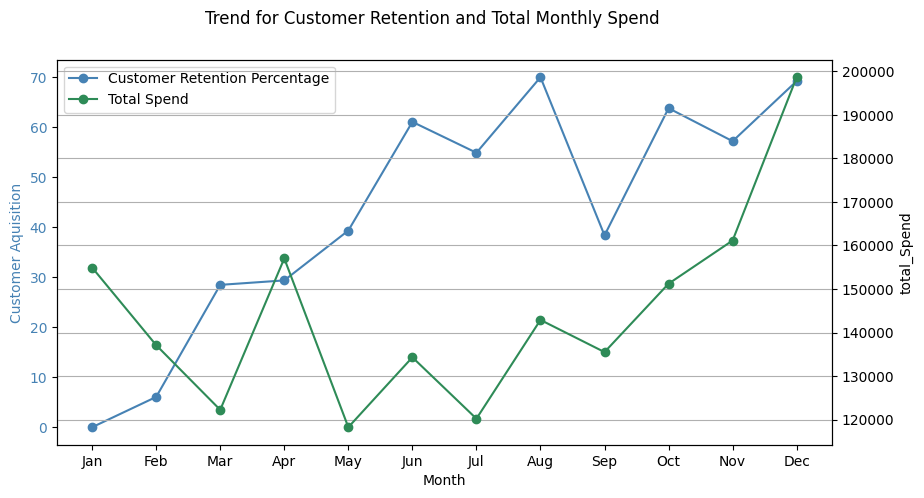

In [82]:
osq3e=osq3d.sort_values('MonthNum')

fig, ax1 = plt.subplots(figsize=(10, 5))

# Customer Acquisition (Left Y-axis)
ax1.plot(osq3e['MonthNum'], osq3e['Customer_Ret_Per'],
         color='steelblue', marker='o', label='Customer Retention Percentage')
ax1.set_xlabel('Month')
ax1.set_ylabel('Customer Aquisition', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Second Y-axis
ax2 = ax1.twinx()

# Total Spend
ax2.plot(osq3e['MonthNum'], osq3e['Total_Spend'],
         color='seagreen', marker='o', label='Total Spend')

ax2.set_ylabel('total_Spend', color='black')

# Title & legend
fig.suptitle('Trend for Customer Retention and Total Monthly Spend')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])

plt.grid(True)
plt.show()

**Conslusion - Customer retention is having loose relation with marketing spend and for most of the month when marketing spend is decreasing, we can see dip in custome rtrend. Also, there is hardly any product launch from MArch to Nov and in Dec, customer retention has increased drastically as we have launched new products.**

Q4 Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.

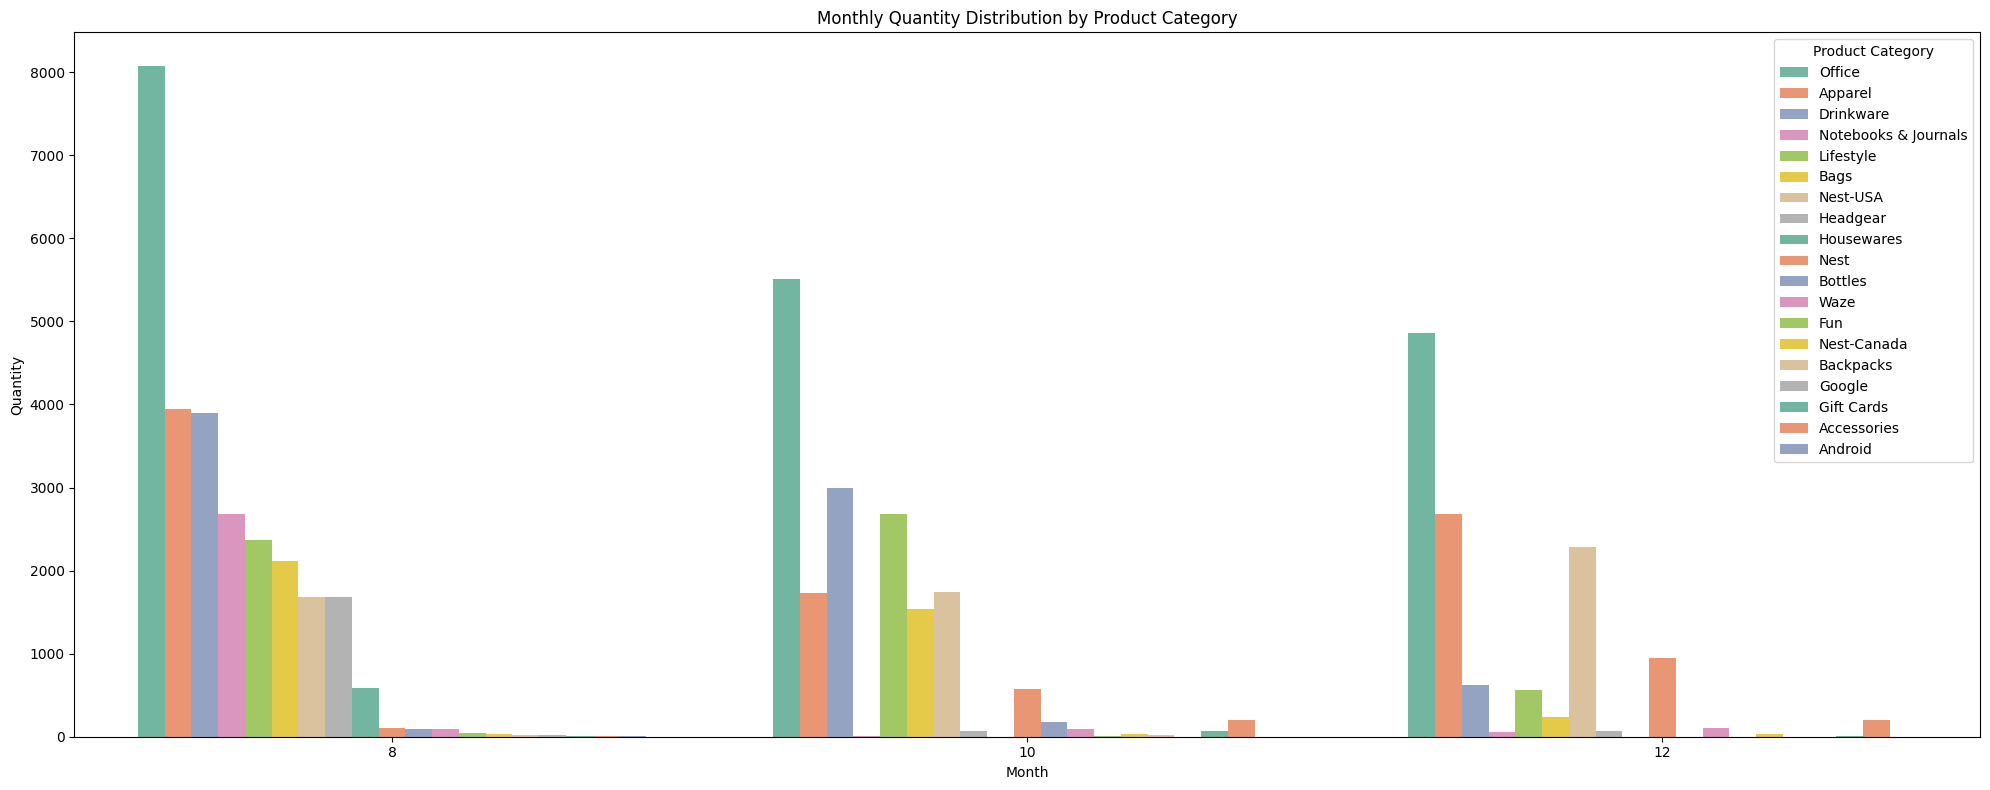

In [84]:

osq4a=osq3.groupby(['Product_Category','MonthNum'])['Quantity'].sum().reset_index().sort_values('Product_Category')
#print(osq4a)

osq4b=osq4a[osq4a['Product_Category'].isin(['Office', 'Apparel', 'Drinkware','Nest-USA'])]

osq4b=osq4b.sort_values(['Product_Category','MonthNum'], ascending=True)


# Extracting data for eight, tenth and twenth month which are higher retention months
osq4a=osq4a[osq4a['MonthNum'].isin([10, 12, 8])]
osq4a=osq4a.sort_values('Quantity', ascending=False)

# Plotting High retention month 8,10 and 12 buying behaviur based on product category
plt.figure(figsize=(20, 8))

sns.barplot(
    data=osq4a,
    x='MonthNum',
    y='Quantity',
    hue='Product_Category',
    palette='Set2'
)

plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Quantity Distribution by Product Category')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

***Conclusion - In higher retention months its sale of office, Apparel and drinkware leading major retention as compared to NEST-USA category which is highest Rev generator. We should give more discount on these categories in other months to increase retention percentage***

Q5 Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?

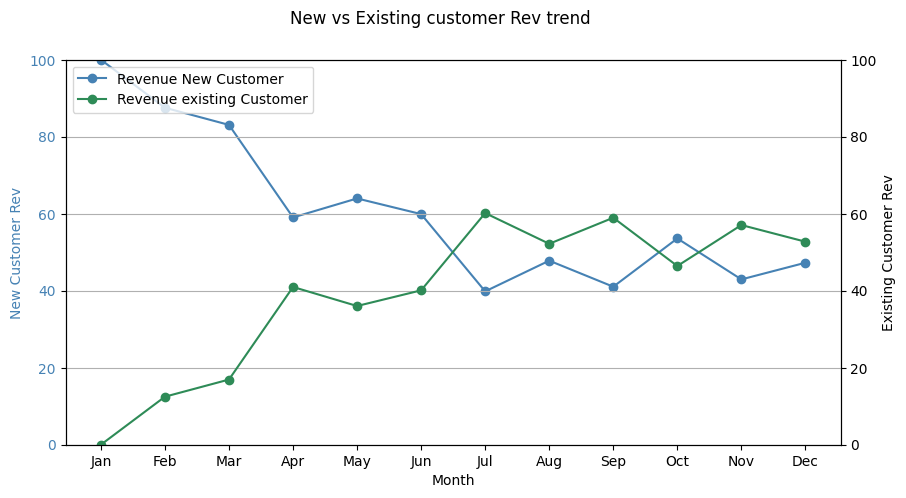

In [92]:
# osfinal is DF which will be used in all questions as it has all data require to work

# Sorting value on transaction date to keep only first tranasction to get count of new customer/month
# Dropping duplicate
osq5=osfinal.sort_values(('Transaction_Date'),ascending=True)
osq5a=osq5.drop_duplicates(subset=['CustomerID'], keep='first',ignore_index=True)

## Extracting all records from OS where customer onboarded on that month
osq5a=pd.merge(osfinal,osq5a[['CustomerID','MonthYr']],on=(['CustomerID','MonthYr']), how='inner')


# Belwo command is to test that data coming is correct for new customer in a month
#osq5t=osq5a.groupby('MonthNum')['CustomerID'].nunique().reset_index().sort_values('MonthNum')
#print(osq5t)

osq5b=osq5a.groupby('MonthNum').agg({'CustomerID':'count','Rev':'sum'}).reset_index().sort_values('MonthNum')
osq5b = osq5b.rename(columns=({'Rev':'Rev_New_Customer','CustomerID':'Customer_new_Count'}))

# Below command is to get only those record who are found in osfinal but not in osq5a
osq5c=pd.merge(osfinal,osq5a[['CustomerID','MonthYr']],on=(['CustomerID','MonthYr']), how='left',indicator='True')
osq5c=osq5c[osq5c['True'] == 'left_only'].drop(['True'],axis=1)

# Creating groupby for existing customer revenue
osq5c=osq5c.groupby('MonthNum').agg({'CustomerID':'count','Rev':'sum'}).reset_index().sort_values('MonthNum')
osq5c = osq5c.rename(columns=({'Rev':'Rev_exi_Customer','CustomerID':'Customer_exi_Count'}))

osq5f=pd.merge(osq5b,osq5c,on=['MonthNum'],how='left')
#osq5f = osq5f.rename(columns=({'CustomerID':'CustomerCount'}))
osq5f=osq5f.fillna(0)
osq5f['Total_rev'] = osq5f['Rev_New_Customer'] + osq5f['Rev_exi_Customer']
osq5f['Total_rev'] = osq5f['Total_rev'].round(2)
osq5f['Rev_New_Customer_per'] = (osq5f['Rev_New_Customer'] / osq5f['Total_rev']) * 100
osq5f['Rev_exi_Customer_per'] = (osq5f['Rev_exi_Customer'] / osq5f['Total_rev']) * 100
osq5f['Rev_New_Customer_per'] = osq5f['Rev_New_Customer_per'].round(2)
osq5f['Rev_exi_Customer_per'] = osq5f['Rev_exi_Customer_per'].round(2)

### Plotting data for Rev trend
fig, ax1 = plt.subplots(figsize=(10, 5))

# Customer Acquisition (Left Y-axis)
ax1.plot(osq5f['MonthNum'], osq5f['Rev_New_Customer_per'],
         color='steelblue', marker='o', label='Revenue New Customer')
ax1.set_xlabel('Month')
ax1.set_ylabel('New Customer Rev', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Second Y-axis
ax2 = ax1.twinx()

# Total Spend
ax2.plot(osq5f['MonthNum'], osq5f['Rev_exi_Customer_per'],
         color='seagreen', marker='o', label='Revenue existing Customer')

ax2.set_ylabel('Existing Customer Rev', color='black')

# Title & legend
fig.suptitle('New vs Existing customer Rev trend')

plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])

y_min = min(osq5f['Rev_exi_Customer_per'].min(), osq5f['Rev_New_Customer_per'].min())
y_max = max(osq5f['Rev_exi_Customer_per'].max(), osq5f['Rev_New_Customer_per'].max())

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


plt.grid(True)
plt.show()



***Conslusion - for First 6 months, revenue from new customer is higher than existing customer and existing customer revenue is continuously increasing and there is drop in new customer revenue. From July, onwards, Rev from new and existing remain in bounded range till end of year. ***

Q6 Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?

   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status MonthYr  MonthNum  \
0         1     153.71               6.5          Used     Jan         1   

   Discount_pct  GST     Rev  
0          10.0  0.1  158.67  


/tmp/ipython-input-2693718656.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


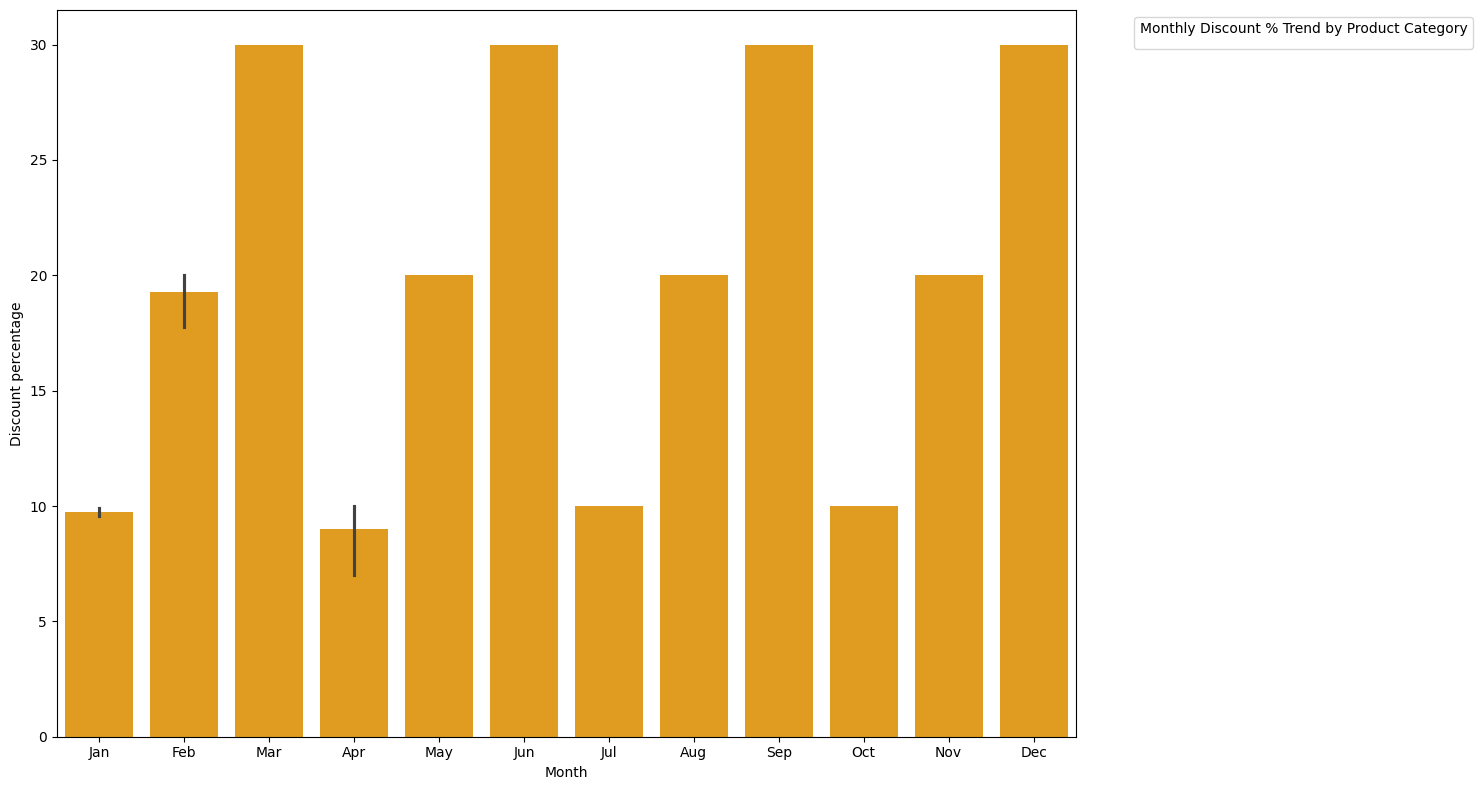

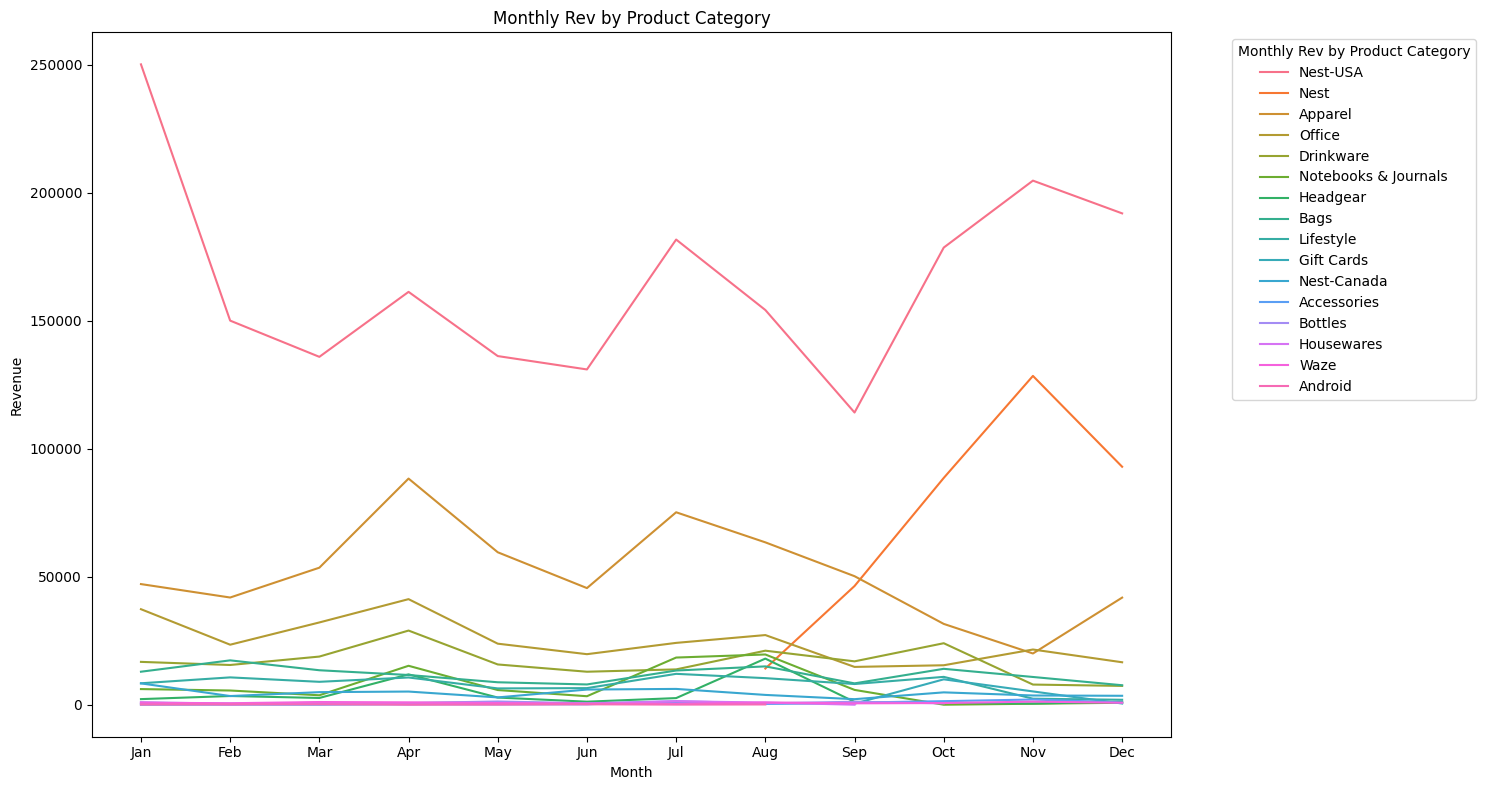

"\nplt.scatter(osq1d['MonthYr_str'], osq1d['Discount_pct'], color='darkorange')\nplt.title('Monthly Discount vs Monthly Customer Acquisition')\nplt.xlabel('Discount %')\nplt.ylabel('Customer Acquisition')\nplt.scatter(osq7f['Discount_pct'], osq1d['CustomerID'], color='darkorange')\nplt.title('Monthly Discount vs Monthly Customer Acquisition')\nplt.xlabel('Discount %')\nplt.ylabel('Customer Acquisition')"

In [59]:
print(osfinal.head(1))

# First extraction data where no coupan is available
osq7a = osfinal[osfinal['Discount_pct'] == 0.0]

# Extracting data where discount is available on product category
osq7b = osfinal[osfinal['Discount_pct'] != 0.0]

# Extracting data where coupan is used and this will be final data to evaluate coupan trend
osq7b1=osq7b[osq7b['Coupon_Status'] != 'Not Used']
osq7d=osq7b1.groupby(['Product_Category','MonthNum']).agg({'Rev':'sum','Quantity':'sum'}).reset_index().sort_values('Rev',ascending=False)


# Get top Product description by Revenue for each product category
osq7f=osq7b1.groupby(['Product_Description','Product_Category']).agg({'Rev':'sum','Quantity':'sum'}).reset_index().sort_values('Rev',ascending=False)


#group all paroduct cateogory on product description
osq7e=osfinal.drop_duplicates(subset=['Product_Description'], keep='first',ignore_index=True)
osprde=osq7e[['Product_Description','Product_Category','MonthNum','Discount_pct']].sort_values('Product_Category')

## plot discount on various category on monthly basis. There is no category based discount

plt.figure(figsize=(15, 8))
#plt.subplot(1, 3, 1)
sns.barplot(
    data=osprde,
    x='MonthNum',
    y='Discount_pct',
    color='orange'
   # marker='o'
    #hue='Product_Category'
)

plt.xlabel('Month')
plt.ylabel('Discount percentage')
#plt.title('Monthly Discount % Trend by Product Category')

plt.legend(
    title='Monthly Discount % Trend by Product Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.xticks(ticks=range(0, 12), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.tight_layout()
plt.show()

# Plot category wise monthly revenue. This will provide detail
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=osq7d,
    x='MonthNum',
    y='Rev',
    hue='Product_Category'
)

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Rev by Product Category')

plt.legend(
    title='Monthly Rev by Product Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.tight_layout()
plt.show()



***Conclusion - Discount are same across all categories and changing only on monthly basis. there are categories such as NEST_USA, NEST, Apparel, office which gives us lot of revenue and good volume as well. We should have flexible discount approach rather than having fixed discount accross all categories in partivular month to increase Rev.***

8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?

/tmp/ipython-input-4065362884.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


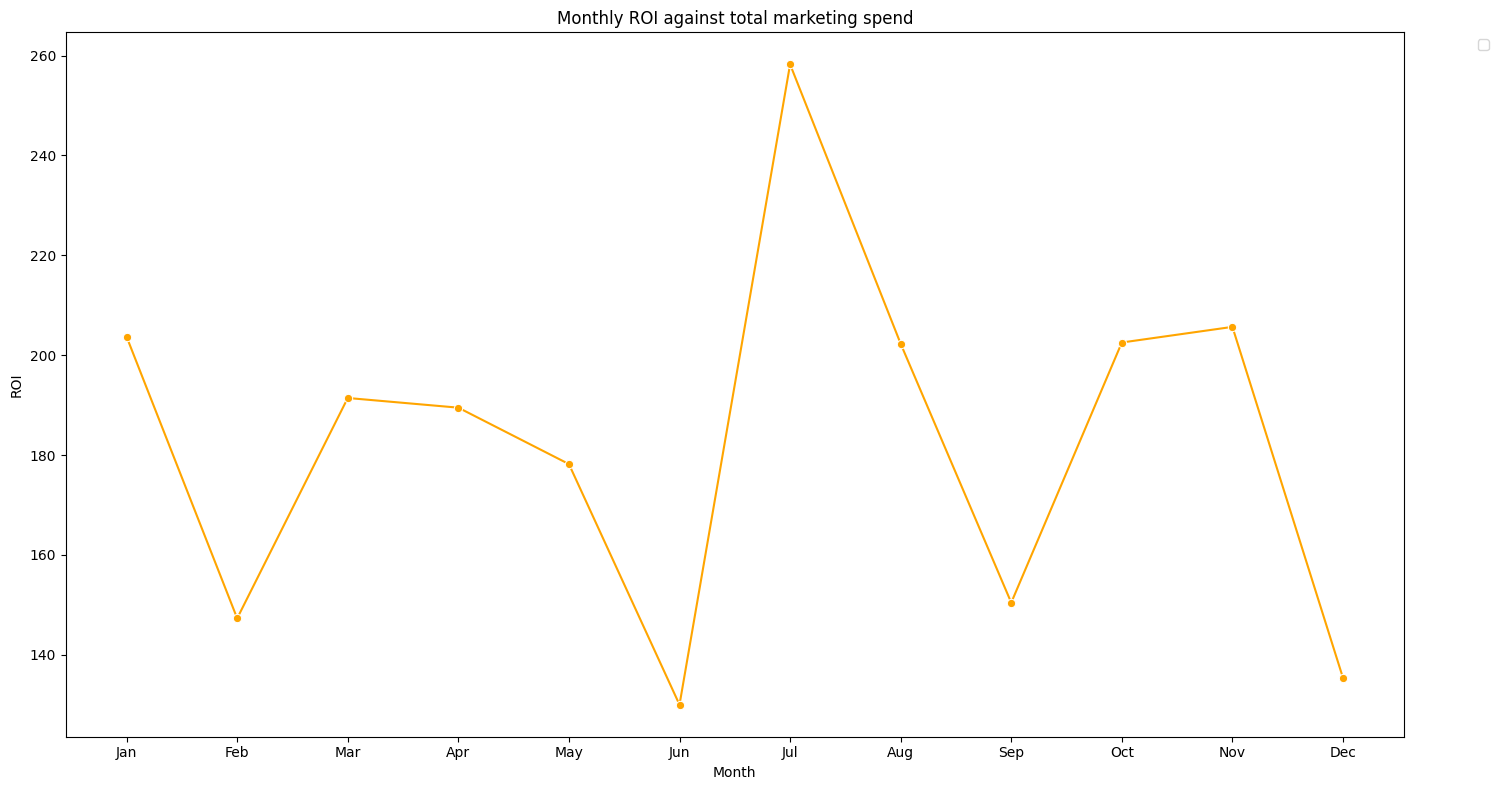

In [85]:


ms['Total_Spend'] = ms['Offline_Spend'] + ms['Online_Spend']


ms2=ms.groupby(['MonthNum','MonthYr']).agg({'Total_Spend':'sum'}).reset_index()


osq8=osfinal.groupby(['MonthNum','MonthYr']).agg({'Rev':'sum'}).reset_index()


osq8a=pd.merge(osq8,ms2,on=['MonthNum','MonthYr'],how='left')


osq8a['ROI'] = (osq8a['Rev'] - osq8a['Total_Spend']) / osq8a['Total_Spend'] * 100

osq8a['ROI'] = osq8a['ROI'].round(2)


## Plotting ROI on monthly basis

# Plot category wise monthly revenue. This will provide detail
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=osq8a,
    x='MonthNum',
    y='ROI',
    marker='o',
    color='orange'
)

plt.xlabel('Month')
plt.ylabel('ROI')
plt.title('Monthly ROI against total marketing spend')

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.tight_layout()
plt.show()




***Conclusion - There is ROI decrease in Month of June, Aug, Sep and Dec. Out of these 4 months for 3 months Marketing spend has increased from previous month, having said that there is no direct rleation against ROI. One observation, we have in month of Dec we have done marketing spend increase of 20+% to around 200K, as per data we should keep marketing spend / month in the range of 120-150K (+- 5%) based on new product launch or festive seasons, if any***

Q9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?

/tmp/ipython-input-401078770.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


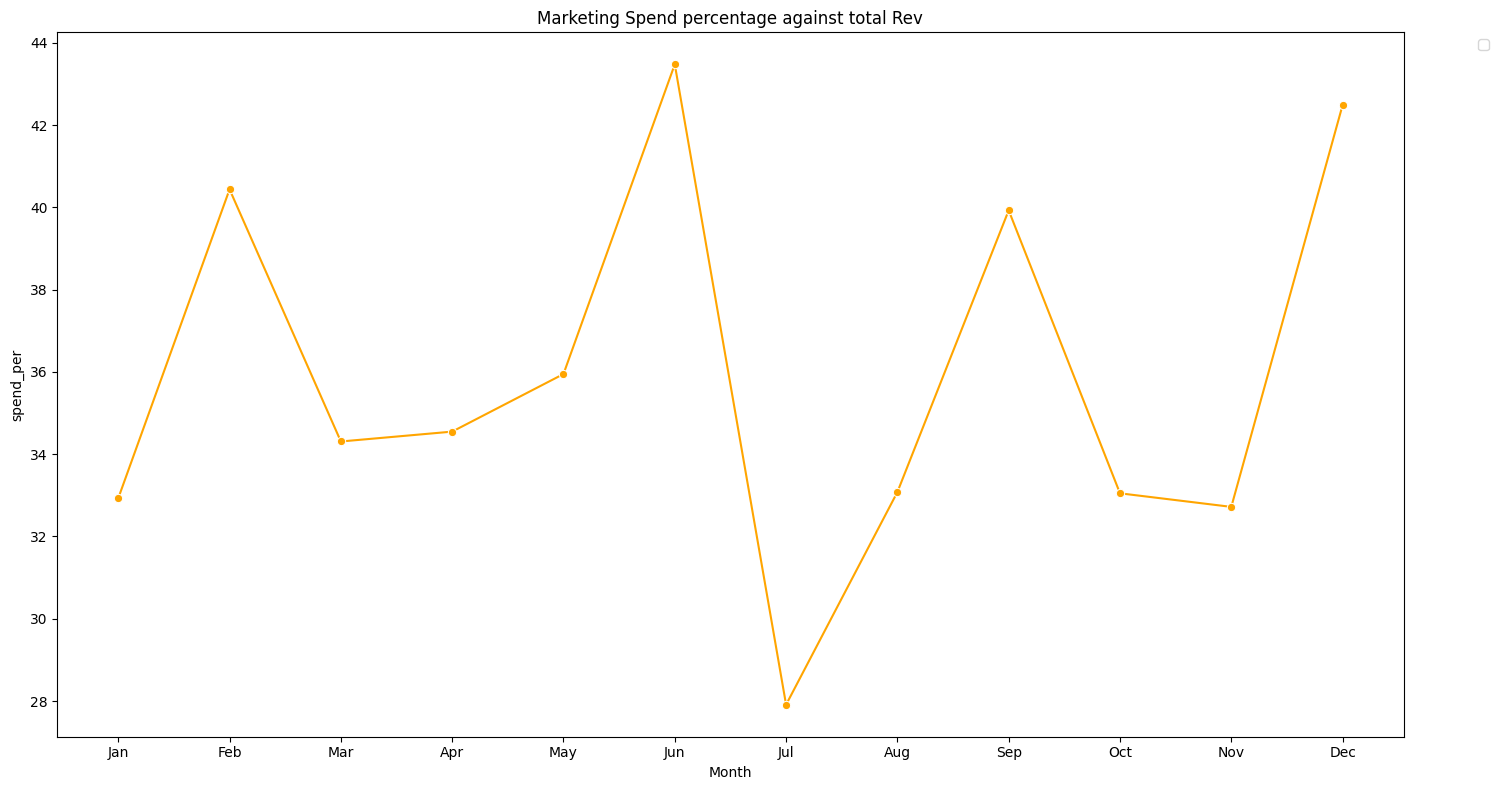

In [86]:

osq9a=osq8a
osq9a['spend_per'] = (osq9a['Total_Spend'] / osq9a['Rev']) * 100
osq9a['spend_per'] = osq9a['spend_per'].round(2)
osq9a=osq9a.sort_values('Total_Spend',ascending=False)

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=osq8a,
    x='MonthNum',
    y='spend_per',
    marker='o',
    color='orange'
)

plt.xlabel('Month')
plt.ylabel('spend_per')
plt.title('Marketing Spend percentage against total Rev')

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.tight_layout()
plt.show()




***Conclusion - There is spend percentage increase in Month of June, Aug, Sep and Dec. Out of these 4 months for 3 months Marketing spend has increased from previous month, havign said that there is no direct relation against Rev increase/decrease. One observation, we have in month of Dec we have done marketing spend increase of 20+% to around 200K, as per data we should keep marketing spend / month in the range of 120-150K (+- 5%) based on new product launch or festive seasons, if any***

Q10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  MonthYr              52924 non-null  object        
 11  MonthNum             52924 non-null  int32         
 12  Discount_pct         52924 non-null  float64       
 13  GST                  52924 non-

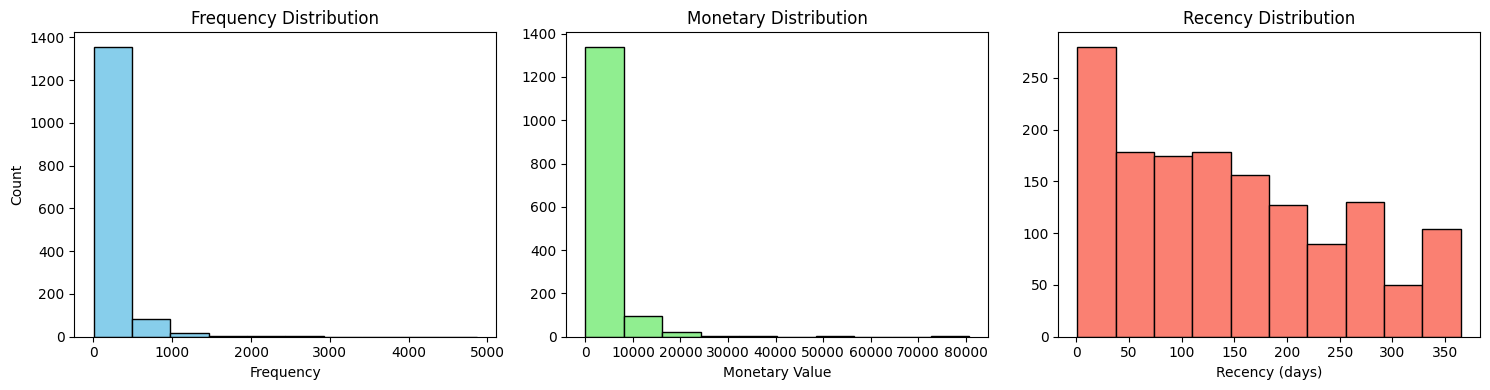

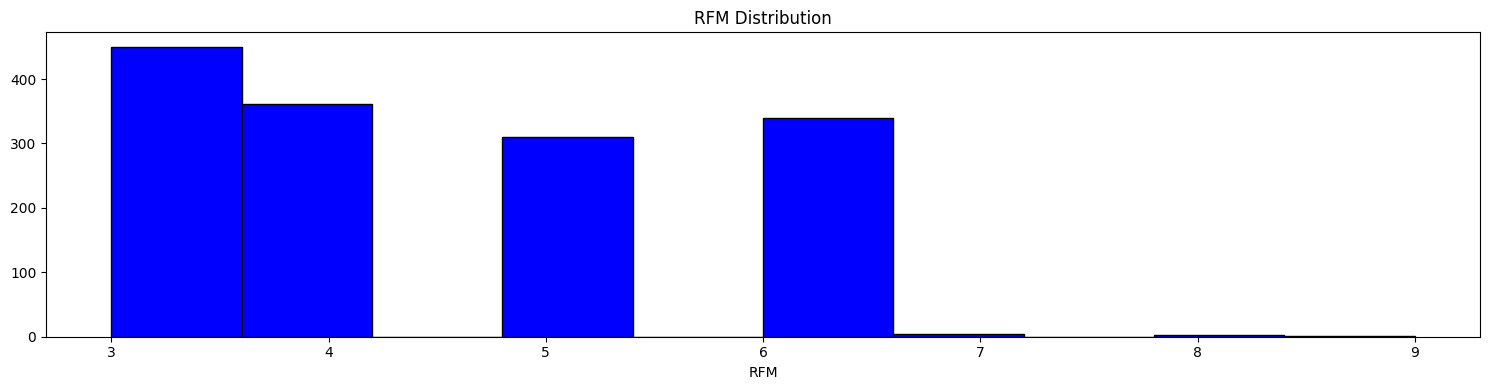

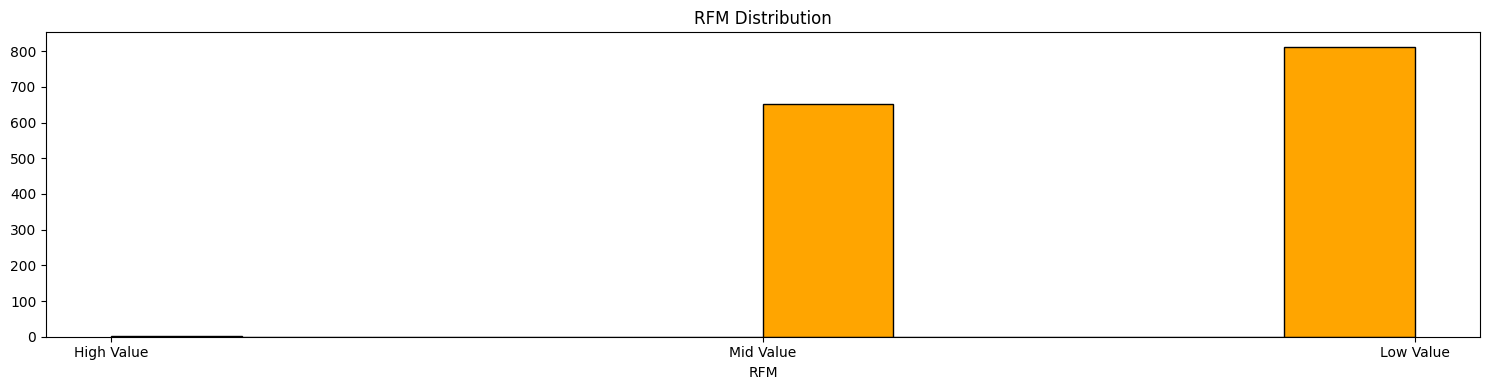

In [87]:
osfinal.info()
Today = pd.to_datetime('2020-01-01')

osq10a=osfinal.groupby('CustomerID').agg({'Quantity':'sum','Rev':'sum','Transaction_Date':
                                          lambda x:(Today - x.max()).days}).reset_index().sort_values('Quantity',ascending=False)

osq10a=osq10a.rename(columns={'Quantity':'Frequency','Rev':'Monetary','Transaction_Date':'Recency'})


### Plotting figure for RFM
plt.figure(figsize=(15, 4))

# Frequency
plt.subplot(1, 3, 1)
plt.hist(osq10a['Frequency'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

# Monetary
plt.subplot(1, 3, 2)
plt.hist(osq10a['Monetary'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value')

# Recency
plt.subplot(1, 3, 3)
plt.hist(osq10a['Recency'], bins=10, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')

plt.tight_layout()
plt.show()

# defining Bins based on data analysis

f_bins = [0, 1250, 2500, 3750, np.inf]
r_bins = [0, 75, 150, 225, np.inf]
m_bins = [0, 20000, 40000, 600000, np.inf]

osq10a['R_Score'] = pd.cut(osq10a['Recency'], bins=r_bins, labels=False) + 1
osq10a['F_Score'] = pd.cut(osq10a['Frequency'], bins=f_bins, labels=False) + 1
osq10a['M_Score'] = pd.cut(osq10a['Monetary'], bins=m_bins, labels=False) + 1


osq10a['final_RFM'] = osq10a['R_Score'] + osq10a['F_Score'] + osq10a['M_Score']


# Plotting RFM
plt.figure(figsize=(15, 4))
plt.hist(osq10a['final_RFM'], bins=10, color='blue', edgecolor='black')
plt.title('RFM Distribution')
plt.xlabel('RFM')

plt.tight_layout()
plt.show()

conditions = [
    osq10a['final_RFM'] <= 4,
    osq10a['final_RFM'] <= 7,
    osq10a['final_RFM'] <= 10
]

choices = [
    'Low Value',
    'Mid Value',
    'High Value'
]

osq10a['RFMLevel'] = np.select(conditions, choices, default='Top Value')

# RFM
plt.figure(figsize=(15, 4))
#plt.subplot(1, 3, 3)
plt.hist(osq10a['RFMLevel'], bins=10, color='orange', edgecolor='black')
plt.title('RFM Distribution')
plt.xlabel('RFM')

plt.tight_layout()
plt.show()



Q11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?

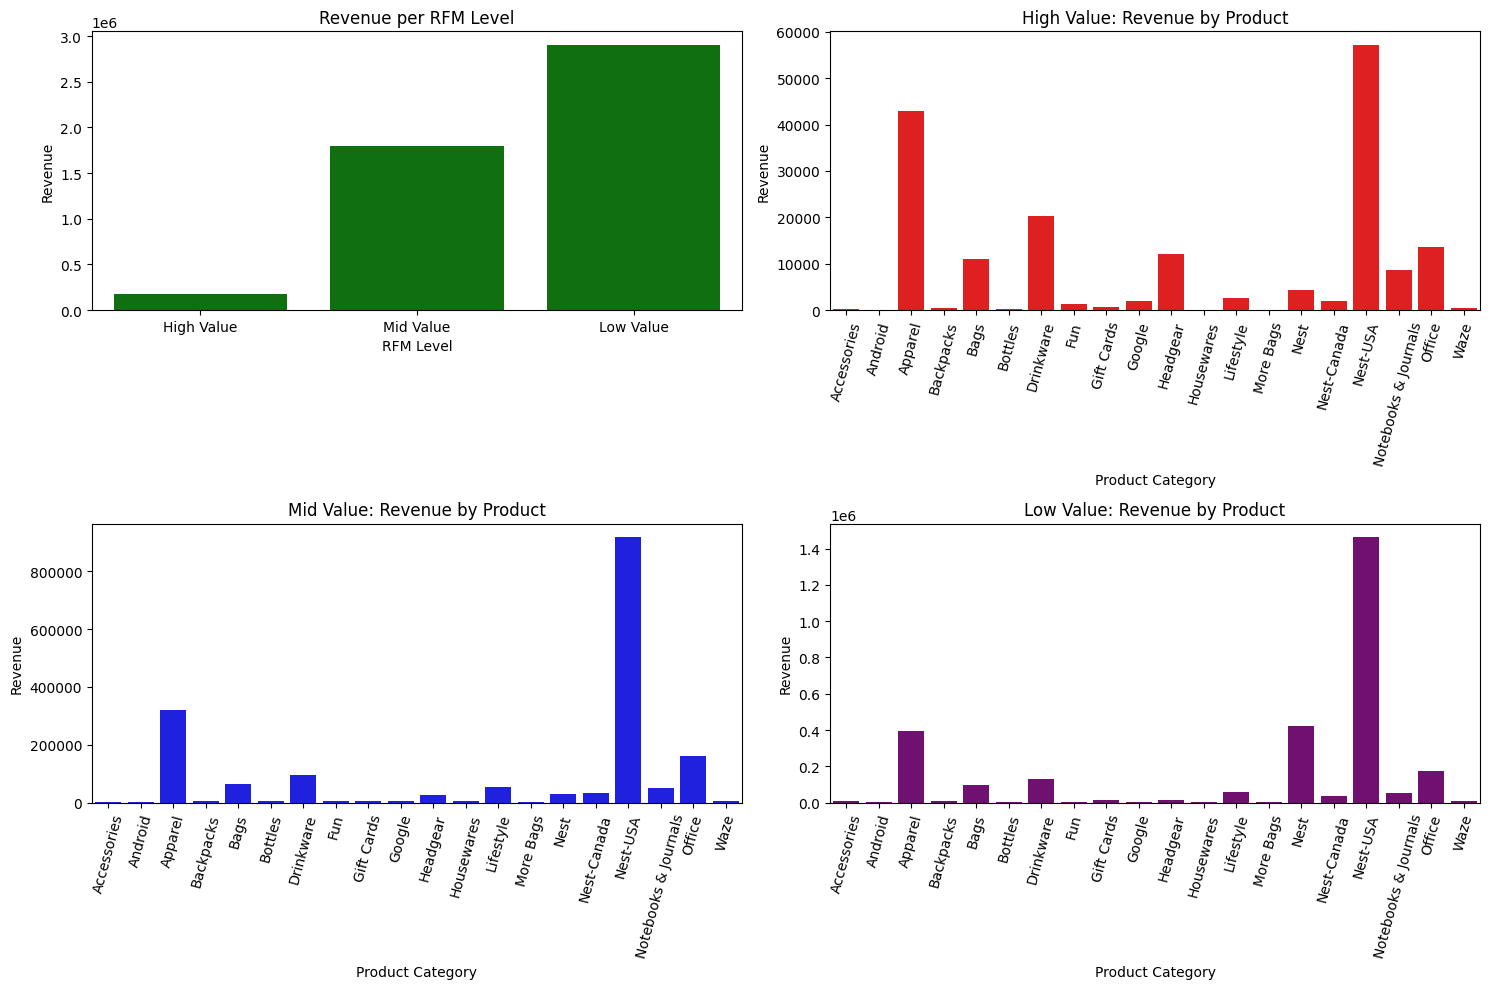

In [88]:

osq11a=pd.merge(osfinal,osq10a[['CustomerID','RFMLevel']],on=['CustomerID'],how='left')


osq11b=osq11a.groupby(['RFMLevel']).agg({'Rev':'sum'}).sort_values('Rev').reset_index()


osq11c=osq11a.groupby(['RFMLevel','Product_Category']).agg({'Rev':'sum'}).sort_values(['RFMLevel','Product_Category']).reset_index()



plt.figure(figsize=(15, 10))  # Increased height for labels

# First Plot: Revenue by RFM Level (Top-Left)
plt.subplot(2, 2, 1)
sns.barplot(data=osq11b, x='RFMLevel', y='Rev', color='g')
plt.xlabel('RFM Level')
plt.ylabel('Revenue')
plt.title('Revenue per RFM Level')

# Second Plot: High Value by Product (Top-Right)
plt.subplot(2, 2, 2)
sns.barplot(data=osq11c[osq11c['RFMLevel'] == 'High Value'],
            x='Product_Category', y='Rev', color='red')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('High Value: Revenue by Product')
plt.xticks(rotation=75)

# Third Plot: Mid Value by Product (Bottom-Left)
plt.subplot(2, 2, 3)
sns.barplot(data=osq11c[osq11c['RFMLevel'] == 'Mid Value'],
            x='Product_Category', y='Rev', color='blue')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Mid Value: Revenue by Product')
plt.xticks(rotation=75)

# Fourth Plot: Low Value by Product (Bottom-Right)
plt.subplot(2, 2, 4)
sns.barplot(data=osq11c[osq11c['RFMLevel'] == 'Low Value'],
            x='Product_Category', y='Rev', color='purple')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Low Value: Revenue by Product')
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()




**Conclusion - High Value customer are buying drinkware, bags and headgear, which is not at same percentage for Low value customer. We should focus to sale these items to move them to high/mid value customer  **

In [ ]:
Q12. Group customers by their month of first purchase and analyze retention rates over time.
Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve
retention for weaker cohorts?

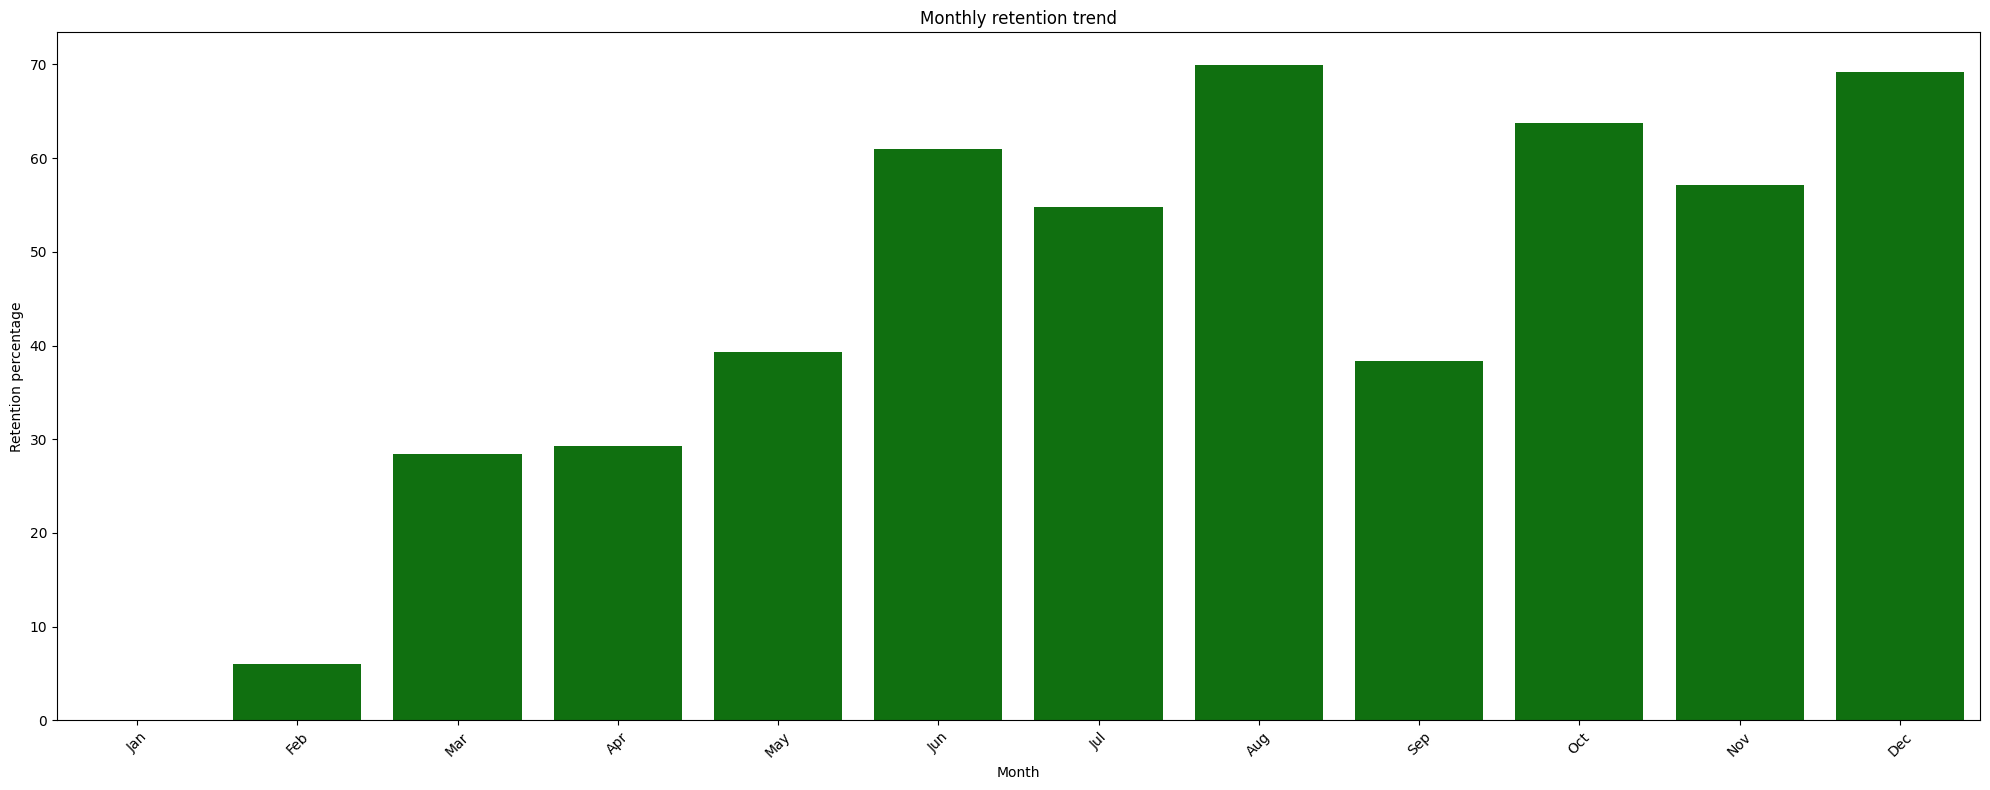

In [65]:
osq3d
#### usine Q3 DF, Create Retention percentage plot for every month and understand month with lower values

plt.figure(figsize=(20, 8))

sns.barplot(data=osq3d, x='MonthNum', y='Customer_Ret_Per', color='g')
plt.xlabel('Month')
plt.ylabel('Retention percentage')
plt.title('Monthly retention trend')

plt.xticks(ticks=range(0, 12), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***This question is mostly answered as part of Q3 and Q4 data analysis:***

**Conclusion - In Last Quarter its sale of office, Apparel and drinkware leading major retention as compared to NEST-USA category which is highest Rev generator. We should give more discount on these categories in other months to increase retention percentage. In Low retention months which is first Quarter sale of this item is very low, so we have to do more marketing on this items. Also, there has to be data on marketing spend per product category to give more detail**

13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?


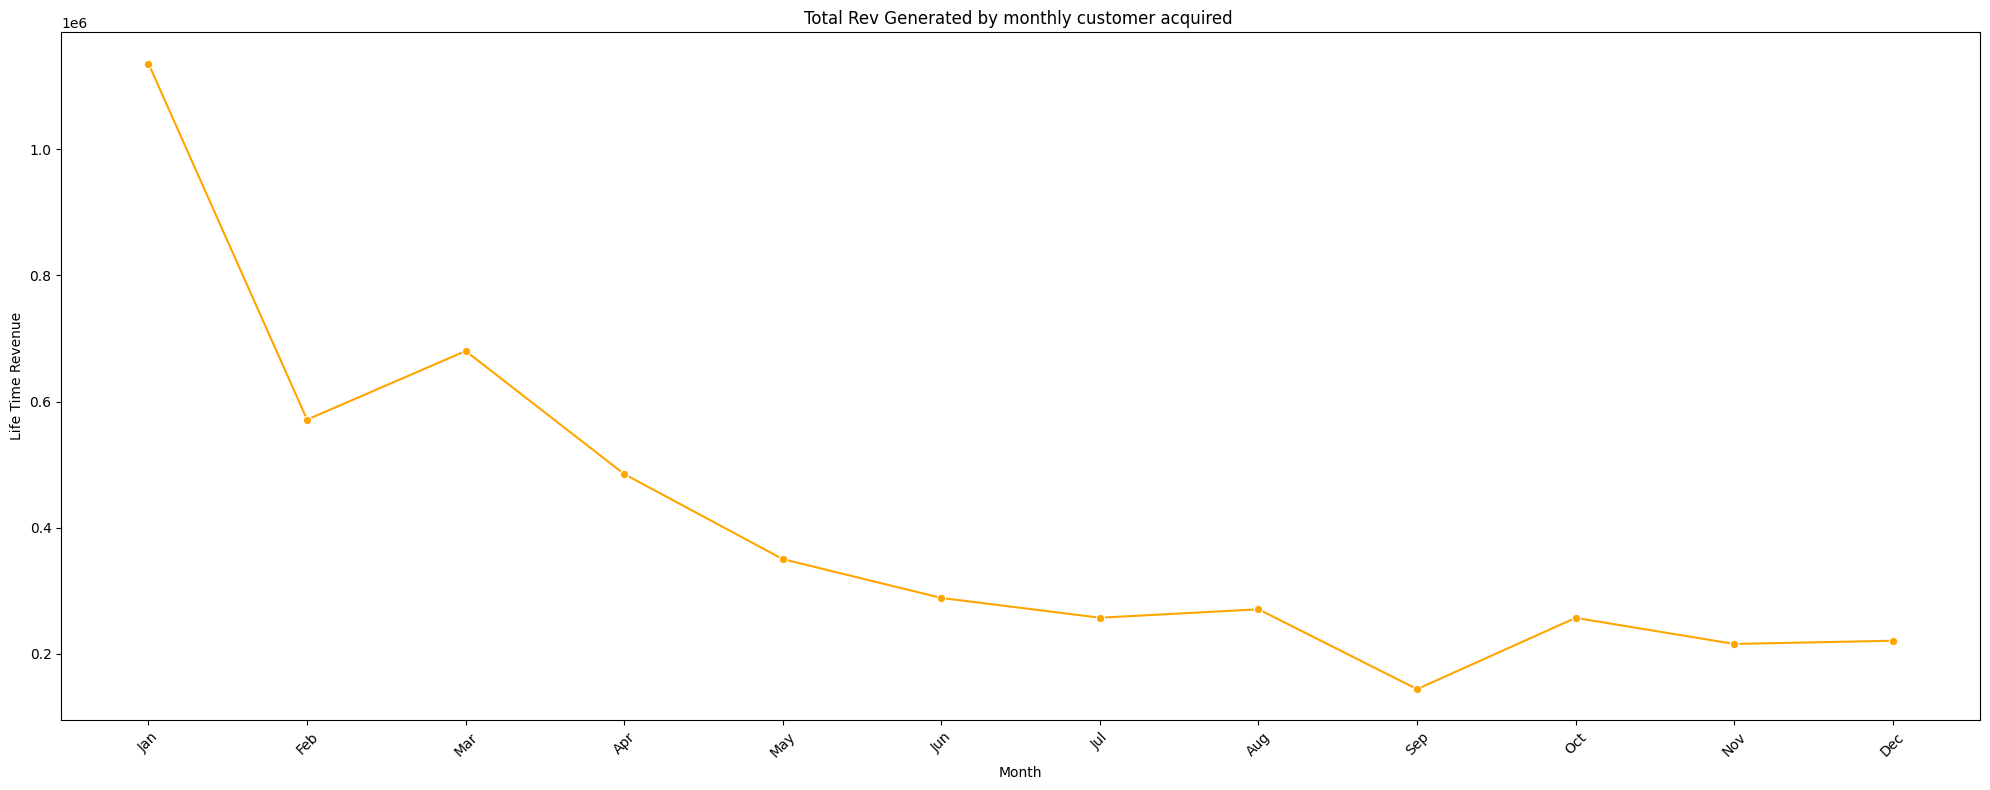

In [121]:

osq13=osfinal.sort_values(('Transaction_Date'),ascending=True)

## Get Revenume of all customer who did transaction in any month
osq13a=osq13.groupby('CustomerID')['Rev'].sum().reset_index().sort_values('CustomerID')


## Get customer who did first transaction in any month
osq13b=osq13.drop_duplicates(subset=['CustomerID'], keep='first',ignore_index=True)
osq13b=osq13b.groupby(['MonthNum','CustomerID'])['MonthYr'].unique().reset_index().sort_values('MonthNum')


# Merge two DF to get customer Acquisition month
osq13c=pd.merge(osq13a,osq13b[['CustomerID','MonthNum']],on='CustomerID',how='left')


# Group by month to get life time Rev of customer acquired in any month
osq13c=osq13c.groupby('MonthNum')['Rev'].sum().reset_index().sort_values('MonthNum')


# Plotting bar graph to see trend
plt.figure(figsize=(20, 8))

sns.lineplot(data=osq13c, x='MonthNum', y='Rev', color='orange',marker='o')
plt.xlabel('Month')
plt.ylabel('Life Time Revenue')
plt.title('Total Rev Generated by monthly customer acquired ')

plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



***Conclusion: Customer acquired in earlier months especially Q1 is having most life time value because they have generated maximum reveneue, it specifies customer is being retained and doing transaction post first month as well. there is drop in Rev by customer onboarded in second half may be because they have got less time to do transaction having said that overall trend in second half is not satisfactory in getting more Revenue value of existing customer***

14. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?
Hint: Analyze sales patterns across different product categories and locations throughout the year to identify recurring peaks and troughs.
Hint: Consider how these seasonal insights can inform inventory management and promotional planning.

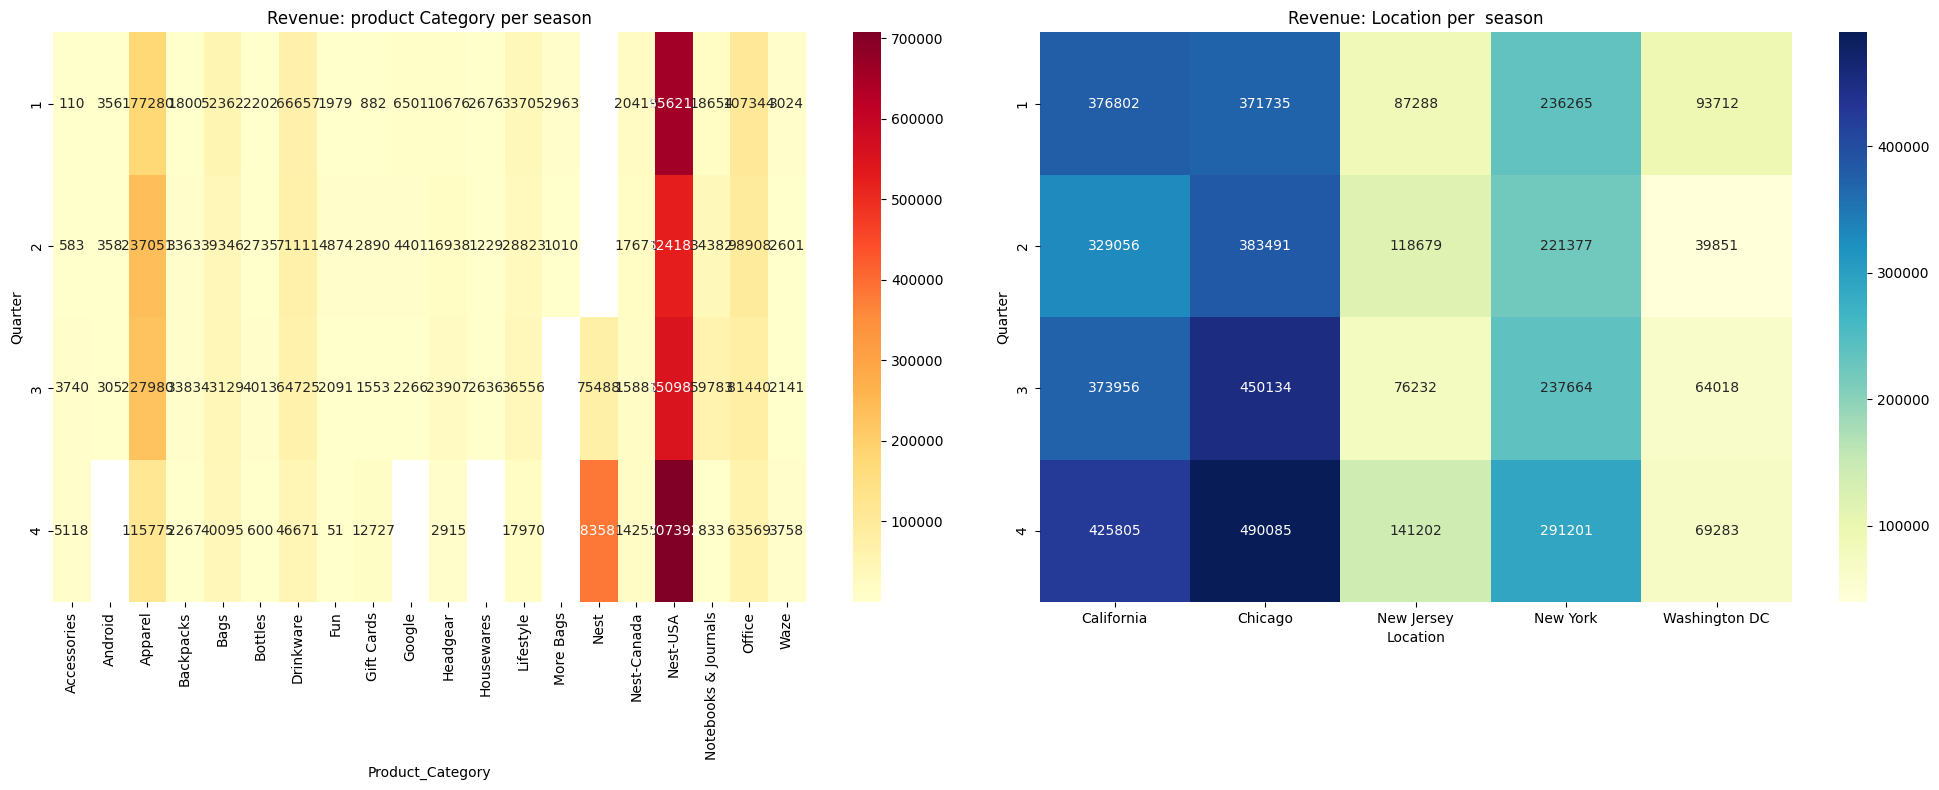

"\n# merging operation sales and customer data table to get location to understand trend based on location\nosca= pd.merge(osq1,cd[['CustomerID','Location']],on=['CustomerID'],how='left')\n#print(osca)\n\n# Group by month and location to get number of transaction done by customer per location\nosq1b=osca.groupby(['MonthNum','Location'])['CustomerID'].count().reset_index().sort_values(['Location','MonthNum'])\nosq1b=osq1b.reset_index(drop=True)\n\n####################\n### Checking location trend for customer Aquisition\n\nplt.figure(figsize=(15, 4))\nsns.scatterplot(\n    data=osq1b,\n    x='MonthNum',\n    y='CustomerID',\n    hue='Location',\n    palette='viridis'\n)\n\nplt.xlabel('Months')\nplt.ylabel('Customer Acquisition')\nplt.title('Location Trend for Customer Acquisition')\nplt.xticks(ticks=range(1, 13), labels=[\n    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'\n])\n\nconditions = [\n    osq10a['final_RFM'] <= 4,\n    osq10a['final_RFM'] <= 7,\n    o

In [150]:
########################################################
# Below is additional analysis to understand is there any part of location in getting new aquition

os14=osfinal
os14['Quarter'] = os14['Transaction_Date'].dt.quarter

os14a=os14.groupby(['CustomerID','Quarter','Product_Category'])['Rev'].sum().reset_index().sort_values('Quarter')

#########################################################
# Below is additional analysis to understand is there any part of location in getting new aquition

# merging operation sales and customer data table to get location to understand trend based on location
os14b= pd.merge(os14a,cd[['CustomerID','Location']],on=['CustomerID'],how='left')

# Group by month and location to get number of transaction done by customer per location
os14c=os14b.groupby(['Quarter','Location','Product_Category'])['Rev'].sum().reset_index().sort_values(['Location','Quarter'])
os14c=os14c.reset_index(drop=True)


####################
### Checking location trend for customer Aquisition

plt.figure(figsize=(20, 8))

# 1. Product Category vs Month (All Locations)
plt.subplot(1, 2, 1)
pivot1 = os14c.pivot_table(values='Rev', index='Quarter', columns='Product_Category', aggfunc='sum')
sns.heatmap(pivot1, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Revenue: product Category per season')


# 2. Location vs Month (All Categories)
plt.subplot(1, 2, 2)
pivot2 = os14c.pivot_table(values='Rev', index='Quarter', columns='Location', aggfunc='sum')
sns.heatmap(pivot2, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Revenue: Location per  season')

plt.tight_layout()
plt.show()

'''
plt.figure(figsize=(15, 8))
# 3. Category vs Location (Peak Month)
plt.subplot(1, 2, 1)
peak_month = os14c.loc[os14c.groupby(['Product_Category','Location'])['Rev'].idxmax()]['Quarter'].mode()[0]
peak_data = os14c[os14c['Quarter'] == peak_month]
pivot3 = peak_data.pivot_table(values='Rev', index='Product_Category', columns='Location', aggfunc='sum')
sns.heatmap(pivot3, annot=True, fmt='.0f', cmap='Reds')
plt.title(f'Peak Month ({peak_month}) Revenue')

# 4. Seasonal Index Heatmap
plt.subplot(1, 2, 2)
monthly_avg = os14c.groupby(['Quarter', 'Product_Category', 'Location'])['Rev'].sum().groupby(['Product_Category', 'Location']).mean()
seasonal = os14c.groupby(['Quarter', 'Product_Category', 'Location'])['Rev'].sum() / monthly_avg * 100
pivot4 = seasonal.reset_index().pivot_table(values='Rev', index='Quarter', columns=['Product_Category','Location'][:5], aggfunc='mean')
sns.heatmap(pivot4, annot=True, fmt='.0f', cmap='RdYlGn', center=100)
plt.title('Seasonal Index (>100=Peak)')

plt.tight_layout()
plt.show()

'''
'''plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=os14c,
    x='MonthNum',
    y='CustomerID',
    hue='Location',
    palette='viridis'
)

plt.xlabel('Months')
plt.ylabel('Customer Acquisition')
plt.title('Location Trend for Customer Acquisition')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''
'''
# merging operation sales and customer data table to get location to understand trend based on location
osca= pd.merge(osq1,cd[['CustomerID','Location']],on=['CustomerID'],how='left')
#print(osca)

# Group by month and location to get number of transaction done by customer per location
osq1b=osca.groupby(['MonthNum','Location'])['CustomerID'].count().reset_index().sort_values(['Location','MonthNum'])
osq1b=osq1b.reset_index(drop=True)

####################
### Checking location trend for customer Aquisition

plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=osq1b,
    x='MonthNum',
    y='CustomerID',
    hue='Location',
    palette='viridis'
)

plt.xlabel('Months')
plt.ylabel('Customer Acquisition')
plt.title('Location Trend for Customer Acquisition')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])

conditions = [
    osq10a['final_RFM'] <= 4,
    osq10a['final_RFM'] <= 7,
    osq10a['final_RFM'] <= 10
]

choices = [
    'Low Value',
    'Mid Value',
    'High Value'
]
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() '''

***Conclusion: In terms of peak season Quarter 4 adn Quarter 1 are good season where from location wie and product category wise we have got decent sales. This reduces in Q2 and Q, sale is low across all location and in product category NEST NEST USA is low resulting in less Rev. We need to ensure marketing and discount strategy to get same or more Rev in these two quarter (season) as well.***  

15. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?
Hint: Identify high-performing and low-performing days by analyzing daily sales data.
Hint: Think about specific strategies that could stimulate sales during identified slower periods.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_Date     3154 non-null   datetime64[ns]
 1   Rev_x                3154 non-null   float64       
 2   CustomerID           3154 non-null   int64         
 3   Transaction_ID       3154 non-null   int64         
 4   Product_SKU          3154 non-null   object        
 5   Product_Description  3154 non-null   object        
 6   Product_Category     3154 non-null   object        
 7   Quantity             3154 non-null   int64         
 8   Avg_Price            3154 non-null   float64       
 9   Delivery_Charges     3154 non-null   float64       
 10  Coupon_Status        3154 non-null   object        
 11  MonthYr              3154 non-null   object        
 12  MonthNum             3154 non-null   int32         
 13  Discount_pct         3154 non-nul

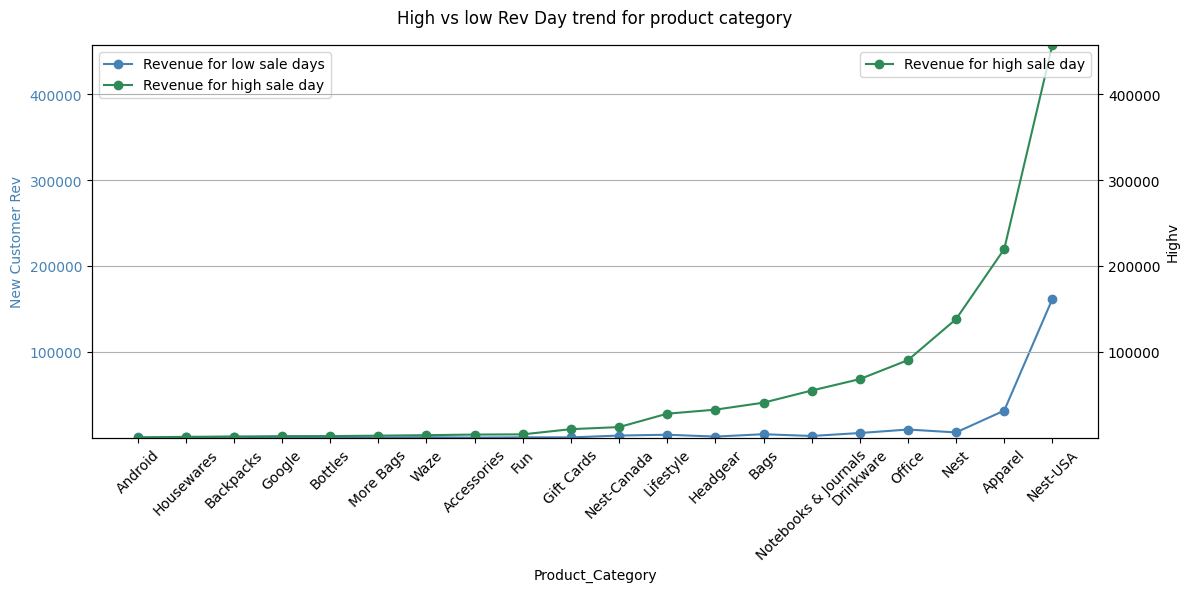

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_Date     3154 non-null   datetime64[ns]
 1   Rev_x                3154 non-null   float64       
 2   CustomerID           3154 non-null   int64         
 3   Transaction_ID       3154 non-null   int64         
 4   Product_SKU          3154 non-null   object        
 5   Product_Description  3154 non-null   object        
 6   Product_Category     3154 non-null   object        
 7   Quantity             3154 non-null   int64         
 8   Avg_Price            3154 non-null   float64       
 9   Delivery_Charges     3154 non-null   float64       
 10  Coupon_Status        3154 non-null   object        
 11  MonthYr              3154 non-null   object        
 12  MonthNum             3154 non-null   int32         
 13  Discount_pct         3154 non-nul

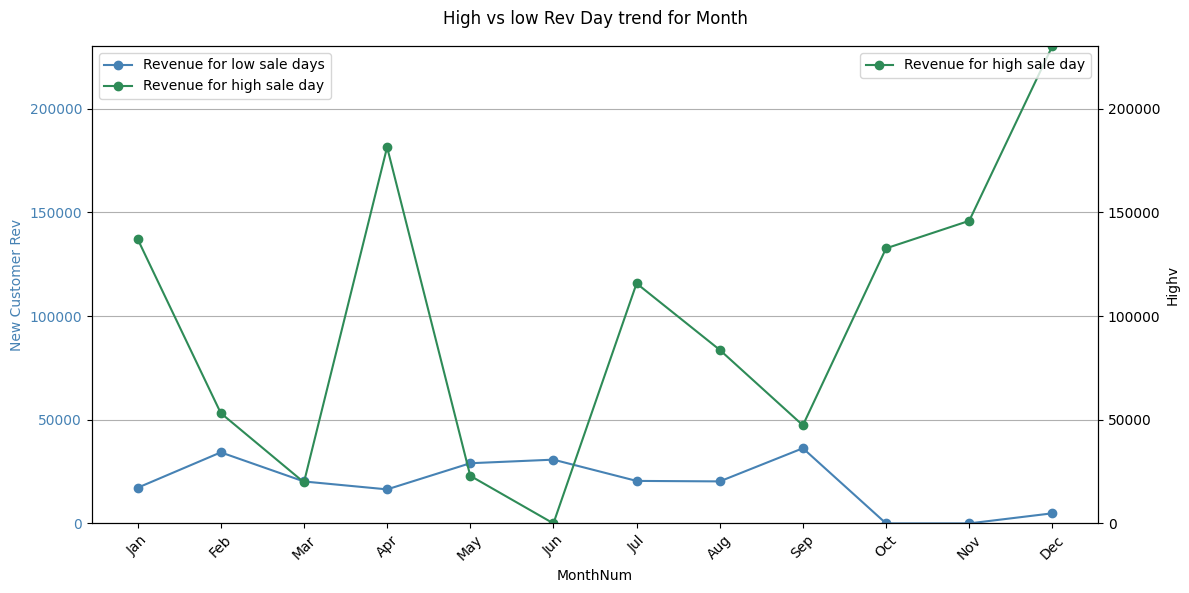

In [194]:
os15=osfinal
#os15['DayNum'] = os15['Transaction_Date'].dt.day
os15a=os15.groupby('Transaction_Date')['Rev'].sum().reset_index().sort_values('Rev')

os15b=os15a.head(45)
os15c=os15a.tail(45)



osq15d=pd.merge(os15b,os15,on='Transaction_Date',how='left')
osq15e=pd.merge(os15c,os15,on='Transaction_Date',how='left')

os15d=osq15d.groupby(['Product_Category'])['Rev_y'].sum().reset_index().sort_values('Rev_y')
os15e=osq15e.groupby(['Product_Category'])['Rev_y'].sum().reset_index().sort_values('Rev_y')
os15d=os15d.reset_index(drop=True)
os15e=os15e.reset_index(drop=True)

os15f=pd.merge(os15e,os15d,on='Product_Category',how='left')

os15f=os15f.rename(columns=({'Rev_y_x':'Rev_high_day', 'Rev_y_y':'Rev_low_day'}))


### Plotting data for Rev trend based on product category for High and low value days
fig, ax1 = plt.subplots(figsize=(12, 6))

#  Revenue for low sale days (Left Y-axis)
ax1.plot(os15f['Product_Category'], os15f['Rev_low_day'],
         color='steelblue', marker='o', label='Revenue for low sale days')
ax1.set_xlabel('Product_Category')
ax1.set_ylabel('New Customer Rev', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
plt.xticks(rotation=45)

# Second Y-axis
ax2 = ax1.twinx()

# Revenue for High sale days
ax2.plot(os15f['Product_Category'], os15f['Rev_high_day'],
         color='seagreen', marker='o', label='Revenue for high sale day')

ax2.set_ylabel('Highv', color='black')

# Title & legend
fig.suptitle('High vs low Rev Day trend for product category')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Grid

y_min = min(os15f['Rev_high_day'].min(), os15f['Rev_low_day'].min())
y_max = max(os15f['Rev_high_day'].max(), os15f['Rev_low_day'].max())

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

###########################
# Analysisng month trend for high and low value days in a month

osq15d=pd.merge(os15b,os15,on='Transaction_Date',how='left')
osq15e=pd.merge(os15c,os15,on='Transaction_Date',how='left')
osq15d.info()

os15g=osq15d.groupby(['MonthNum'])['Rev_y'].sum().reset_index().sort_values('Rev_y')
os15h=osq15e.groupby(['MonthNum'])['Rev_y'].sum().reset_index().sort_values('Rev_y')
os15g=os15g.reset_index(drop=True)
os15h=os15h.reset_index(drop=True)

os15i=pd.merge(os15g,os15h,on='MonthNum',how='outer')

os15i=os15i.rename(columns=({'Rev_y_y':'Rev_high_day', 'Rev_y_x':'Rev_low_day'}))
#print(os15i)
os15i=os15i.fillna(0)
#print(os15i)



### Plotting data for Rev trend
fig, ax1 = plt.subplots(figsize=(12, 6))

# Customer Acquisition (Left Y-axis)
ax1.plot(os15i['MonthNum'], os15i['Rev_low_day'],
         color='steelblue', marker='o', label='Revenue for low sale days')
ax1.set_xlabel('MonthNum')
ax1.set_ylabel('New Customer Rev', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.xticks(rotation=45)


# Second Y-axis
ax2 = ax1.twinx()

# Total Spend
ax2.plot(os15i['MonthNum'], os15i['Rev_high_day'],
         color='seagreen', marker='o', label='Revenue for high sale day')

ax2.set_ylabel('Highv', color='black')

# Title & legend
fig.suptitle('High vs low Rev Day trend for Month')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Grid

y_min = min(os15i['Rev_high_day'].min(), os15i['Rev_low_day'].min())
y_max = max(os15i['Rev_high_day'].max(), os15i['Rev_low_day'].max())

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


***Conclusion: During High sales day, we can see there is high sales for Below Product categoty: Nest-USA, Apparel, Nest, Office, Drinksware, headgear. We need to provide discount Category. Also, on months where we have high Rev and Low Rev Day, we can see in Jun, March, Sep we hardly has high Rev days and we need to replicate sales done in April, Oct, nov and Dec product Category for High Rev for these months.***   

Although I have completed data analysis, I feel data provided is not enough to conclude onn trend and below are main reasons:

1) Discount differ across months and not based on  product category
2) Market sales is very high level and it didn't show any product level marketing
3) Product LAunch is also very wierd for business where no product launched for 9 months.

## We will require more detailed data to complete detailed analysis on this.


a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
aa
a
a
a
